**Nama**: Dzakiyyah Afifah Rahma <br>
**NIM**: 215150701111027 <br>
**Kelas**: Big Data dan Analitik - A



---



# **Predictive Analysis: Hotel Pricing** 🛏 📊

## **1. Pemilihan Domain dan Dataset** 💾


*   **Domain**: Tourism and Travel ✈
*   **Problem Statement**: Implementasi model machine learning untuk memprediksi harga hotel berdasarkan atribut yang dimiliki; Mengetahui fitur-fitur yang berpengaruh dalam memprediksi harga hotel
* **Dataset**: Dataset ***Airbnb Price Dataset*** adalah kumpulan data atribut hotel yang terdiri dari **74111 data**, **29 fitur**, dan berukuran **101,55 MB**. Dataset dapat diunduh pada platform Kaggle pada link berikut [Dataset Airbnb Price Dataset 💲](https://www.kaggle.com/datasets/rupindersinghrana/airbnb-price-dataset/data)









## **2. Proses ETL (Extract, Transform, Loading)** ➡️

### **2.1 Extract**

Pada percobaan ini, data diambil dari platform **Kaggle** dalam bentuk format `.csv`.

In [1]:
!pip install -q kaggle

In [2]:
!kaggle datasets download -d rupindersinghrana/airbnb-price-dataset

Dataset URL: https://www.kaggle.com/datasets/rupindersinghrana/airbnb-price-dataset
License(s): apache-2.0
 58% 18.0M/31.3M [00:00<00:00, 99.0MB/s]
100% 31.3M/31.3M [00:00<00:00, 127MB/s] 


In [3]:
import zipfile

zip_ref = zipfile.ZipFile('/content/airbnb-price-dataset.zip', 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [4]:
import pandas as pd

df = pd.read_csv('/content/Airbnb_Data.csv')
df

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,40.709025,-73.939405,one room bushwick,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/55162426/6...,11206.0,1.0,1.0
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206.0,2.0,2.0
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,40.738535,-74.000157,Designer's Apartment in HEART of NYC,West Village,0,NaN,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0


Output kode tersebut memberikan informasi sebagai berikut:
*   Terdapat **74111 baris** records dalam dataset
*   Terdapat **29 kolom** yaitu: id, log_price, property_type, room_type, amenities, accommodates, bathrooms, bed_type, cancellation_policy, cleaning_fee, city, description, first_review, host_has_profile_pic, host_identify_verified, host_response_rate, host_since, instant_bookable, last_review, latitude, longitude, name, neighbourhood, number_of_reviews, review_scores_rating, thumbnail_url, zipcode, bedrooms, dan beds <br>

Detail lebih lengkap untuk setiap fitur akan dibahas pada langkah-langkah selanjutnya.



### **2.2 Transform**

Proses transform berfungsi untuk membersihkan dan memproses data agar siap untuk dianalisis. Pada percobaan ini, proses transform terdiri dari proses **pemahaman data** 👌🏻 dan **preprocessing data** 🧹.

### **Data Understanding** 🧠

**Deskripsi Variabel** 🔤

Berikut adalah variabel-variabel pada dataset Airbnb Price:
1. **id**: identitas unik untuk setiap properti
2. **log_price**: harga sewa per malam untuk setiap properti (dalam bentuk logaritma)
3. **property_type**: jenis properti yang disewakan
4. **room_type**: jenis kamar yang disewakan
5. **amenities**: daftar fasilitas yang disediakan setiap properti
6. **accomodates**: jumlah maksimal tamu yang dapat ditampung dalam setiap properti
7. **bathrooms**: jumlah kamar mandi pada setiap properti
8. **bed_type**: jenis tempat tidur yang tersedia
9. **cancellation_policy**: status kebijakan pembatalan yang diterapkan
10. **cleaning_fee**: biaya tambahan untuk membersihkan properti (True/False)
11. **city**: kota tempat properti berada
12. **description**: deskripsi detail tentang properti
13. **first_review**: tanggal ulasan pertama untuk setiap properti
14. **host_has_profile_pic**: apakah tuan rumah menggunakan foto profil
15. **host_identify_verified**: apakah tuan rumah telah diverifikasi oleh Airbnb
16. **host_response_rate**: tingkat respons tuan rumah terhadap pelayanan tamu
17. **host_since**: tanggal tuan rumah bergabung dengan Airbnb
18. **instant_bookable**: apakah tamu dapat memesan secara langsung
19. **last_review**: tanggal ulasan terakhir untuk setiap properti
20. **latitude**: koordinat lintang lokasi setiap properti
21. **longitude**: koordinat bujur lokasi setiap properti
22. **name**: nama properti
23. **neighbourhood**: kawasan tempat properti berada
24. **number_of_reviews**: jumlah totak ulasan setiap properti
25. **review_scores_rating**: rata-rata nilai ulasan untuk setiap properti
26. **thumbnail_url**: URL gambar dari setiap properti
27. **zipcode**: kode pos untuk setiap properti
28. **bedrooms**: jumlah kamar tidur pada setiap properti
29. **beds**: jumlah tempat tidur pada setiap properti

**Data Overview** 🧐

In [5]:
# cek informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

Berdasarkan output tersebut diketahui bahwa:


*   Terdapat **19 kolom** dengan tipe object dan **1 kolom** bertipe boolean, yaitu: property_type, room_type, amenities, bed_type, cancellation_policy, cleaning_fee, city, description, first_review, host_has_profile_pic, host_identity_verified, host_response_rate, host_since, instant_bookable, last_review, name, neighbourhood, thumbnail_url, dan zipcode. Kolom ini merupakan categorical features (fitur non-numerik)
*   Terdapat **10 kolom** numerik dengan tipe data float64 dan int64 yaitu: id, log_price, accommodates, bathrooms, latitude, longitude, number_of_reviewa, review_scores_rating, bedrooms, dan beds.

In [6]:
# mengecek setiap tipe pada fitur kategorikal
categorical = df.select_dtypes(include='object').columns
for column in categorical:
  print(f"banyaknya data kolom {column}")
  print(df[column].value_counts())
  print("\n")

banyaknya data kolom property_type
property_type
Apartment             49003
House                 16511
Condominium            2658
Townhouse              1692
Loft                   1244
Other                   607
Guesthouse              498
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    72
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartment       21
Tent                     18
Castle                   13
Vacation home            11
Yurt                      9
Hut                       8
Treehouse                 7
Chalet                    6
Earth House               4
Tipi                      3
Train                     2
Cave                      2
Casa particular           1
Parking Space             1
Lighthouse                1

Berdasarkan output tersebut diketahui bahwa:
*   Terdapat beberapa kolom yang dinilai tidak relevan dalam pembangunan model prediksi, sehingga kolom-kolom ini nantinya akan dihapus pada tahap data preprocessing
*   Pada kolom `property_type` dan `cancellation_policy`, data yang memiliki value count rendah akan digabung untuk menghindari overfitting pada model prediksi
* Kolom `amenities` berisi dictionary yang menunjukkan daftar fasilitas yang dimiliki setiap properti, dictionary akan diubah kedalam bentuk value count untuk menghitung jumlah aminities pada setiap properti
* Kolom `host_response_rate` mengandung tanda persen (%) sehingga tipe data menjadi object. Pada tahap data preprocessing tanda persen (%) akan dihapus dan kolom `host_response_rate` diubah menjadi data numerik




In [7]:
# cek deskripsi statistik
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [8]:
# mencari missing values
df.isnull().sum()

,0
id,0
log_price,0
property_type,0
room_type,0
amenities,0
accommodates,0
bathrooms,200
bed_type,0
cancellation_policy,0
cleaning_fee,0


Dari informasi di atas diketahui bahwa **terdapat data yang kosong (missing value)** pada beberapa kolom dalam dataset Airbnb Price. Penanganan missing value akan dilakukan pada tahap data preprocessing.

In [9]:
# mengecek duplikasi pada dataset
print(f"Banyak data duplikat: {df.duplicated().sum()}")

Banyak data duplikat: 0


Dari informasi di atas diketahui bahwa **tidak ada data duplikat** pada dataset Airbnb Price.

### **Data Preprocessing** 🔍

**Menghapus Kolom yang Tidak Revelan** ❌

Menurut [Ibrahim Mohammed](https://www.sciencedirect.com/science/article/abs/pii/S144767701930083X), et.al (2019), harga kamar hotel dapat berubah karena beberapa faktor seperti kepadatan penjualan, ukuran properti, rating, dan heterogenitas konsumen. Oleh karena itu, pada percobaan ini, kolom yang tidak berhubungan dengan faktor-faktor tersebut akan dihapus. Kolom yang akan dihapus adalah kolom id, description, first_review, host_has_profile_pic, host_since, last_review, latitude, longitude, name, neighbourhood, thumbnail_url, dan zipcode.

In [10]:
# menghapus kolom yang tidak relevan
df = df.drop(['id', 'description', 'first_review', 'host_has_profile_pic', 'host_since', 'last_review', 'latitude', 'longitude', 'name', 'neighbourhood', 'thumbnail_url', 'zipcode'], axis=1)
df

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,t,NaN,f,2,100.0,1.0,1.0
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,f,100%,t,6,93.0,3.0,3.0
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,t,100%,t,10,92.0,1.0,3.0
3,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,t,NaN,f,0,NaN,2.0,2.0
4,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,t,100%,t,4,40.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,NYC,t,NaN,f,0,NaN,1.0,1.0
74107,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,LA,f,100%,f,16,93.0,2.0,4.0
74108,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,NYC,t,100%,t,43,94.0,2.0,2.0
74109,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,NYC,f,100%,t,0,NaN,0.0,2.0


Setelah kolom yang tidak relevan dihapus, dataset Airbnb Price memiliki **17 kolom** yang akan digunakan untuk tahap selanjutnya.

**Menggabung Kolom yang Memiliki Value Count Rendah** 🧮

In [11]:
# menggabungkan data yang memiliki value count rendah pada kolom property type
value_count = df['property_type'].value_counts()
print(value_count)

property_type
Apartment             49003
House                 16511
Condominium            2658
Townhouse              1692
Loft                   1244
Other                   607
Guesthouse              498
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    72
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartment       21
Tent                     18
Castle                   13
Vacation home            11
Yurt                      9
Hut                       8
Treehouse                 7
Chalet                    6
Earth House               4
Tipi                      3
Train                     2
Cave                      2
Casa particular           1
Parking Space             1
Lighthouse                1
Island                    1
Name: 

In [12]:
# menggabungkan property_type yang kurang dari 50
df['property_type'] = df['property_type'].apply(lambda x: 'Other' if value_count[x] < 50 else x)
value_count_new = df['property_type'].value_counts()
print(value_count_new)

property_type
Apartment          49003
House              16511
Condominium         2658
Townhouse           1692
Loft                1244
Other                715
Guesthouse           498
Bed & Breakfast      462
Bungalow             366
Villa                179
Dorm                 142
Guest suite          123
Camper/RV             94
Timeshare             77
Cabin                 72
In-law                71
Hostel                70
Boutique hotel        69
Boat                  65
Name: count, dtype: int64


Properti-properti pada kolom `property_type ` yang berjumlah kurang dari 50 `<50` dimasukkan ke dalam kategori 'Other'. Hal ini dilakukan agar data menjadi lebih stabil dan menghindari overfitting pada model.

In [13]:
# menggabungkan data yang memiliki value count rendah pada kolom cancellation policy
df['cancellation_policy'] = df['cancellation_policy'].replace(['super_strict_30', 'super_strict_60'], 'super_strict')
value_count = df['cancellation_policy'].value_counts()
print(value_count)

cancellation_policy
strict          32374
flexible        22545
moderate        19063
super_strict      129
Name: count, dtype: int64


Data pada kolom `cancellation_policy` yang sebelumnya terbagi menjadi tipe `super_strict_30` dan `super_strict_60 `digabung menjadi tipe super_strict.

**Mengubah Dictionary pada Kolom Amenities** 🚠

In [14]:
amenities = []
for i in df['amenities']:
  amenities.append(len(i))

df['amenities'] = amenities
df['amenities'].head()

,amenities
0,152
1,218
2,311
3,210
4,174


Kode tersebut mengubah dictionary pada kolom `amenities` menjadi **jumlah fasilitas/amenities** yang ada pada setiap properti. Kolom `amenities` berubah menjadi fitur numerik yang akan digunakan untuk melakukan prediksi harga.

**Mengubah Kolom Host Response Rate Menjadi Fitur Numerik** 💬

In [15]:
# convert tipe data untuk kolom host_response_rate
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype('float') / 100.0
df['host_response_rate'].head()

,host_response_rate
0,NaN
1,1.0
2,1.0
3,NaN
4,1.0


In [16]:
# mengecek tipe data
df['host_response_rate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 74111 entries, 0 to 74110
Series name: host_response_rate
Non-Null Count  Dtype  
--------------  -----  
55812 non-null  float64
dtypes: float64(1)
memory usage: 579.1 KB


Kode tersebut menghapus tanda persen (%) untuk setiap nilai pada kolom `host_response_rate` dan mengubah tipe data kolom tersebut menjadi `float64`.

**Menangani Missing Value** 💸

In [17]:
# melihta kolom data dengan missing values
df.isnull().sum()

,0
log_price,0
property_type,0
room_type,0
amenities,0
accommodates,0
bathrooms,200
bed_type,0
cancellation_policy,0
cleaning_fee,0
city,0


Pada percobaan ini akan dilakukan **imputasi** menggunakan nilai **median** untuk mengatasi missing value pada **fitur numerik** dan **modus** untuk mengatasi missing value pada **fitur kategorikal**. Imputasi dilakukan dengan bantuan library `scikit-learn`.

In [18]:
# imputasi fitur numerik
from sklearn.impute import SimpleImputer
import pandas as pd

SImputer = SimpleImputer(strategy='median')
SImputer.fit(df.select_dtypes(include='number'))
imputer = SImputer.transform(df.select_dtypes(include='number'))
df_imputer_num = pd.DataFrame(imputer, columns=df.select_dtypes(include='number').columns)
df_imputer_num.head()

,log_price,amenities,accommodates,bathrooms,host_response_rate,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,152.0,3.0,1.0,1.0,2.0,100.0,1.0,1.0
1,5.129899,218.0,7.0,1.0,1.0,6.0,93.0,3.0,3.0
2,4.976734,311.0,5.0,1.0,1.0,10.0,92.0,1.0,3.0
3,6.620073,210.0,4.0,1.0,1.0,0.0,96.0,2.0,2.0
4,4.744932,174.0,2.0,1.0,1.0,4.0,40.0,0.0,1.0


Kode tersebut mengisi missing value pada fitur numerik menggunakan median. <br>
*   `SimpleImputer(strategy='median')` membuat objek `SimpleImputer` dari library scikit-learn. Sedangkan argumen `strategy='median'` menetapkan median sebagai metode yang digunakan untuk mengisi missing value.
*   Metode `.fit` pada objek SImputer berfungsi untuk mempelajari distribusi data, dalam hal ini metode `.fit` berfungsi untuk menghitung nilai median pada kolom numerik yang dipilih
* Metode `.transform ` berfungsi untuk melakukan transformasi dengan menggunakan informasi yang dipelajari dari metode `.fit` untuk mengisi missing value pada kolom numerik yang dipilih
* Variabel `df_imputer_num` berisi dataframe baru yang berisi data setelah dilakukan imputasi namun tetap menggunakan nama kolom sebagaimana data asli



In [19]:
# mengecek missing value pada fitur numerik
df_imputer_num.isnull().sum()

,0
log_price,0
amenities,0
accommodates,0
bathrooms,0
host_response_rate,0
number_of_reviews,0
review_scores_rating,0
bedrooms,0
beds,0


In [20]:
# imputasi fitur kategorikal
SImputer = SimpleImputer(strategy='most_frequent')
SImputer.fit(df.select_dtypes(include='object'))
imputer = SImputer.transform(df.select_dtypes(include='object'))
df_imputer_cat = pd.DataFrame(imputer, columns=df.select_dtypes(include='object').columns)
df_imputer_cat.head()

,property_type,room_type,bed_type,cancellation_policy,city,host_identity_verified,instant_bookable
0,Apartment,Entire home/apt,Real Bed,strict,NYC,t,f
1,Apartment,Entire home/apt,Real Bed,strict,NYC,f,t
2,Apartment,Entire home/apt,Real Bed,moderate,NYC,t,t
3,House,Entire home/apt,Real Bed,flexible,SF,t,f
4,Apartment,Entire home/apt,Real Bed,moderate,DC,t,t


Kode tersebut melakukan hal yang sama dengan imputasi yang dilakukan pada fitur numerik, namun strategy yang digunakan berbeda.
*   Argumen `strategy='most_frequent'` pada tahap ini menetapkan nilai modus sebagai metode yang digunakan untuk mengisi missing value pada data kategorikal



In [21]:
# mengecek missing value pada fitur kategorikal
df_imputer_cat.isnull().sum()

,0
property_type,0
room_type,0
bed_type,0
cancellation_policy,0
city,0
host_identity_verified,0
instant_bookable,0


In [22]:
 # menggabungkan fitur numerik dan fitur kategorikal yang tidak mengandung missing value
 df_new = pd.concat([df_imputer_num, df_imputer_cat], axis=1)
 df_new['cleaning_fee'] = df['cleaning_fee']
 df_new

,log_price,amenities,accommodates,bathrooms,host_response_rate,number_of_reviews,review_scores_rating,bedrooms,beds,property_type,room_type,bed_type,cancellation_policy,city,host_identity_verified,instant_bookable,cleaning_fee
0,5.010635,152.0,3.0,1.0,1.0,2.0,100.0,1.0,1.0,Apartment,Entire home/apt,Real Bed,strict,NYC,t,f,True
1,5.129899,218.0,7.0,1.0,1.0,6.0,93.0,3.0,3.0,Apartment,Entire home/apt,Real Bed,strict,NYC,f,t,True
2,4.976734,311.0,5.0,1.0,1.0,10.0,92.0,1.0,3.0,Apartment,Entire home/apt,Real Bed,moderate,NYC,t,t,True
3,6.620073,210.0,4.0,1.0,1.0,0.0,96.0,2.0,2.0,House,Entire home/apt,Real Bed,flexible,SF,t,f,True
4,4.744932,174.0,2.0,1.0,1.0,4.0,40.0,0.0,1.0,Apartment,Entire home/apt,Real Bed,moderate,DC,t,t,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,4.605170,2.0,1.0,1.0,1.0,0.0,96.0,1.0,1.0,Apartment,Private room,Real Bed,flexible,NYC,t,f,False
74107,5.043425,224.0,4.0,2.0,1.0,16.0,93.0,2.0,4.0,Apartment,Entire home/apt,Real Bed,moderate,LA,f,f,True
74108,5.220356,402.0,5.0,1.0,1.0,43.0,94.0,2.0,2.0,Apartment,Entire home/apt,Real Bed,moderate,NYC,t,t,True
74109,5.273000,189.0,2.0,1.0,1.0,0.0,96.0,0.0,2.0,Apartment,Entire home/apt,Real Bed,strict,NYC,f,t,True


In [23]:
df_new.isnull().sum()

,0
log_price,0
amenities,0
accommodates,0
bathrooms,0
host_response_rate,0
number_of_reviews,0
review_scores_rating,0
bedrooms,0
beds,0
property_type,0


Kode tersebut menggabungkan dataframe fitur numerik dan fitur kategorikal yang tidak memiliki missing value menjadi satu dataframe. Output di atas menunjukkan bahwa dataset tidak lagi memiliki missing value.

In [24]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               74111 non-null  float64
 1   amenities               74111 non-null  float64
 2   accommodates            74111 non-null  float64
 3   bathrooms               74111 non-null  float64
 4   host_response_rate      74111 non-null  float64
 5   number_of_reviews       74111 non-null  float64
 6   review_scores_rating    74111 non-null  float64
 7   bedrooms                74111 non-null  float64
 8   beds                    74111 non-null  float64
 9   property_type           74111 non-null  object 
 10  room_type               74111 non-null  object 
 11  bed_type                74111 non-null  object 
 12  cancellation_policy     74111 non-null  object 
 13  city                    74111 non-null  object 
 14  host_identity_verified  74111 non-null

### **2.3 Load**

Dataset yang sudah dibersihkan pada tahap transform akan disimpan dalam bentuk file `.csv` menggunakan library `pandas`.

In [25]:
df_new.to_csv('Airbnb_clean_data.csv', index=False)

Pada percobaan ini, dataset juga akan disimpan menggunakan platform big data dalam bentuk **Spark Dataframe**.

In [26]:
# membuat SparkSession
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('HotelPrice').getOrCreate()

Kode di atas berfungsi untuk membuat instance `SparkSession` dengan nama 'HotelPrice'. `SparkSession` dapat digunakan untuk membuat DataFrame, mendaftarkan DataFrame sebagai tables, mengeksekusi SQL pada tables, cache tables, dan membaca file parquet.

In [27]:
# membaca data dari sumber
df = spark.read.csv('Airbnb_clean_data.csv', header=True, inferSchema=True)

Spark DataFrame dapat membaca data dari berbagai sumber seperti CSV, JSON, Parquet, dan database. Pada percobaan ini, dataset **Airbnb Price** memiliki format `.csv`. Kode tersebut digunakan untuk membaca data pada file `Airbnb_clean_data.csv` menggunakan metode `read` pada `SparkSession.` <br>

*   Parameter `header=True` menunjukkan bahwa baris pertama pada data merupakan **nama kolom**
*   Parameter `inferSchema=True` berfungsi untuk membuat Spark secara otomatis menebak **tipe data** untuk setiap kolom



In [28]:
# menampilkan spark dataframe
df.show()

+------------------+---------+------------+---------+------------------+-----------------+--------------------+--------+----+-------------+---------------+--------+-------------------+-------+----------------------+----------------+------------+
|         log_price|amenities|accommodates|bathrooms|host_response_rate|number_of_reviews|review_scores_rating|bedrooms|beds|property_type|      room_type|bed_type|cancellation_policy|   city|host_identity_verified|instant_bookable|cleaning_fee|
+------------------+---------+------------+---------+------------------+-----------------+--------------------+--------+----+-------------+---------------+--------+-------------------+-------+----------------------+----------------+------------+
| 5.010635294096256|    152.0|         3.0|      1.0|               1.0|              2.0|               100.0|     1.0| 1.0|    Apartment|Entire home/apt|Real Bed|             strict|    NYC|                     t|               f|        true|
|5.1298987149230

In [29]:
# menampilkan tipe data yang tersimpan dalam spark dataframe
df.printSchema()

root
 |-- log_price: double (nullable = true)
 |-- amenities: double (nullable = true)
 |-- accommodates: double (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- host_response_rate: double (nullable = true)
 |-- number_of_reviews: double (nullable = true)
 |-- review_scores_rating: double (nullable = true)
 |-- bedrooms: double (nullable = true)
 |-- beds: double (nullable = true)
 |-- property_type: string (nullable = true)
 |-- room_type: string (nullable = true)
 |-- bed_type: string (nullable = true)
 |-- cancellation_policy: string (nullable = true)
 |-- city: string (nullable = true)
 |-- host_identity_verified: string (nullable = true)
 |-- instant_bookable: string (nullable = true)
 |-- cleaning_fee: boolean (nullable = true)



## **3. Exploratory Data Analysis (EDA)** 📈

In [30]:
# konversi dataframe spark menjadi pandas dataframe
df_pandas = df.toPandas()
df_pandas

,log_price,amenities,accommodates,bathrooms,host_response_rate,number_of_reviews,review_scores_rating,bedrooms,beds,property_type,room_type,bed_type,cancellation_policy,city,host_identity_verified,instant_bookable,cleaning_fee
0,5.010635,152.0,3.0,1.0,1.0,2.0,100.0,1.0,1.0,Apartment,Entire home/apt,Real Bed,strict,NYC,t,f,True
1,5.129899,218.0,7.0,1.0,1.0,6.0,93.0,3.0,3.0,Apartment,Entire home/apt,Real Bed,strict,NYC,f,t,True
2,4.976734,311.0,5.0,1.0,1.0,10.0,92.0,1.0,3.0,Apartment,Entire home/apt,Real Bed,moderate,NYC,t,t,True
3,6.620073,210.0,4.0,1.0,1.0,0.0,96.0,2.0,2.0,House,Entire home/apt,Real Bed,flexible,SF,t,f,True
4,4.744932,174.0,2.0,1.0,1.0,4.0,40.0,0.0,1.0,Apartment,Entire home/apt,Real Bed,moderate,DC,t,t,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,4.605170,2.0,1.0,1.0,1.0,0.0,96.0,1.0,1.0,Apartment,Private room,Real Bed,flexible,NYC,t,f,False
74107,5.043425,224.0,4.0,2.0,1.0,16.0,93.0,2.0,4.0,Apartment,Entire home/apt,Real Bed,moderate,LA,f,f,True
74108,5.220356,402.0,5.0,1.0,1.0,43.0,94.0,2.0,2.0,Apartment,Entire home/apt,Real Bed,moderate,NYC,t,t,True
74109,5.273000,189.0,2.0,1.0,1.0,0.0,96.0,0.0,2.0,Apartment,Entire home/apt,Real Bed,strict,NYC,f,t,True


Untuk mempermudah proses visualisasi pada tahap exploratory data analysis menggunakan library `matplotlib`, dataset yang telah disimpan dalam spark dataframe akan dikonversi ke dalam bentuk pandas dataframe.

In [31]:
# mengecek info df_pandas
df_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               74111 non-null  float64
 1   amenities               74111 non-null  float64
 2   accommodates            74111 non-null  float64
 3   bathrooms               74111 non-null  float64
 4   host_response_rate      74111 non-null  float64
 5   number_of_reviews       74111 non-null  float64
 6   review_scores_rating    74111 non-null  float64
 7   bedrooms                74111 non-null  float64
 8   beds                    74111 non-null  float64
 9   property_type           74111 non-null  object 
 10  room_type               74111 non-null  object 
 11  bed_type                74111 non-null  object 
 12  cancellation_policy     74111 non-null  object 
 13  city                    74111 non-null  object 
 14  host_identity_verified  74111 non-null

### **3.1 EDA - Univariate Analysis** 1️⃣

In [32]:
# membagi dataset menjadi numerical dan categorical features
numerical = df_pandas.select_dtypes(include=['number']).columns
categorical = df_pandas.select_dtypes(include=['object', 'bool']).columns

print(f"Berikut adalah fitur numerik: {numerical}")
print(f"Berikut adalah fitur kategorikal: {categorical}")

Berikut adalah fitur numerik: Index(['log_price', 'amenities', 'accommodates', 'bathrooms',
       'host_response_rate', 'number_of_reviews', 'review_scores_rating',
       'bedrooms', 'beds'],
      dtype='object')
Berikut adalah fitur kategorikal: Index(['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city',
       'host_identity_verified', 'instant_bookable', 'cleaning_fee'],
      dtype='object')


Kode tersebut membagi dataset menjadi fitur numerik dan kategorikal. Berdasarkan output di atas terdapat **9 fitur numerik** dan **8 fitur kategorikal**.

In [33]:
# import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

**Analisis Fitur Kategorikal** ⭕

                 jumlah sample  persentase
property_type                             
Apartment                49003        66.1
House                    16511        22.3
Condominium               2658         3.6
Townhouse                 1692         2.3
Loft                      1244         1.7
Other                      715         1.0
Guesthouse                 498         0.7
Bed & Breakfast            462         0.6
Bungalow                   366         0.5
Villa                      179         0.2
Dorm                       142         0.2
Guest suite                123         0.2
Camper/RV                   94         0.1
Timeshare                   77         0.1
Cabin                       72         0.1
In-law                      71         0.1
Hostel                      70         0.1
Boutique hotel              69         0.1
Boat                        65         0.1


<Axes: title={'center': 'property_type'}, xlabel='property_type'>

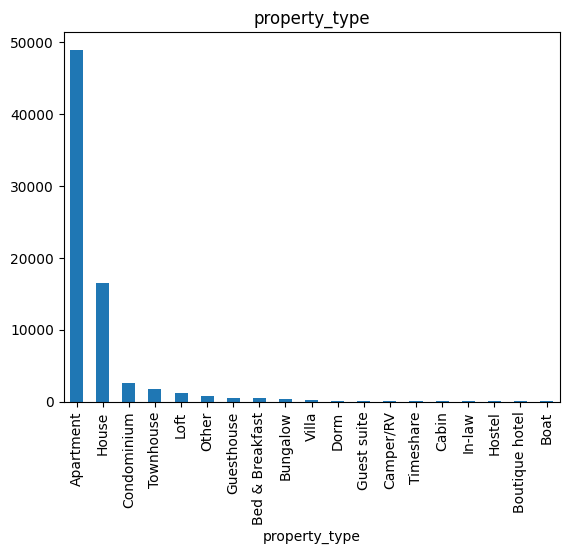

In [34]:
# Fitur property_type
feature = categorical[0]
count = df_pandas[feature].value_counts()
percent = 100*df_pandas[feature].value_counts(normalize=True)
df_property = pd.DataFrame({'jumlah sample':count, 'persentase':percent.round(1)})
print(df_property)
count.plot(kind='bar', title=feature)

Terdapat **19 kategori** pada fitur Property Type. Dari data persentase dapat disimpulkan bahwa sebagian besar orang lebih memilih memesan **kamar apartment (66.1%)** atau **rumah (22.3%)**.

                 jumlah sample  persentase
room_type                                 
Entire home/apt          41310        55.7
Private room             30638        41.3
Shared room               2163         2.9


<Axes: title={'center': 'room_type'}, xlabel='room_type'>

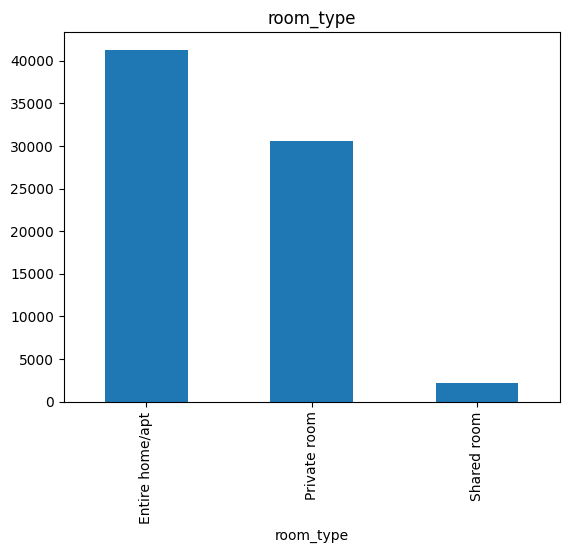

In [35]:
# Fitur room_type
feature = categorical[1]
count = df_pandas[feature].value_counts()
percent = 100*df_pandas[feature].value_counts(normalize=True)
df_room = pd.DataFrame({'jumlah sample':count, 'persentase':percent.round(1)})
print(df_room)
count.plot(kind='bar', title=feature)

Terdapat **3 kategori** pada fitur Room Type. Dari data persentase dapat disimpulkan bahwa sebagian besar orang lebih memilih memesan **entire home/apt (55.7%)** atau **private room (41.3%)**.

               jumlah sample  persentase
bed_type                                
Real Bed               72028        97.2
Futon                    753         1.0
Pull-out Sofa            585         0.8
Airbed                   477         0.6
Couch                    268         0.4


<Axes: title={'center': 'bed_type'}, xlabel='bed_type'>

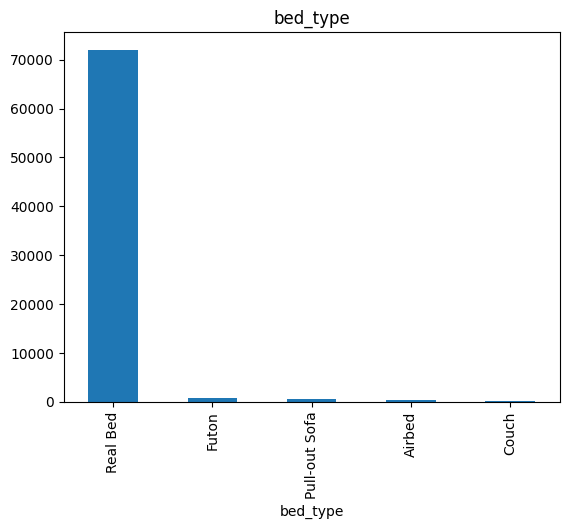

In [36]:
# Fitur bed_type
feature = categorical[2]
count = df_pandas[feature].value_counts()
percent = 100*df_pandas[feature].value_counts(normalize=True)
df_bed = pd.DataFrame({'jumlah sample':count, 'persentase':percent.round(1)})
print(df_bed)
count.plot(kind='bar', title=feature)

Terdapat **5 kategori** pada fitur Bed Type, secara berurutan dari jumlahnya yang paling banyak yaitu Real Bed, Fution, Pull-out Sofa, Airbed, dan Couch. Dari data persentase dapat disimpulkan bahwa sebagian besar property memiliki tempat tidur berjenis **real bed (97.2%)**. Persentase ini sangat berbeda jauh dengan tipe tempat tidur lainnya dengan rata-rata hanya **0.7%**.

                     jumlah sample  persentase
cancellation_policy                           
strict                       32374        43.7
flexible                     22545        30.4
moderate                     19063        25.7
super_strict                   129         0.2


<Axes: title={'center': 'cancellation_policy'}, xlabel='cancellation_policy'>

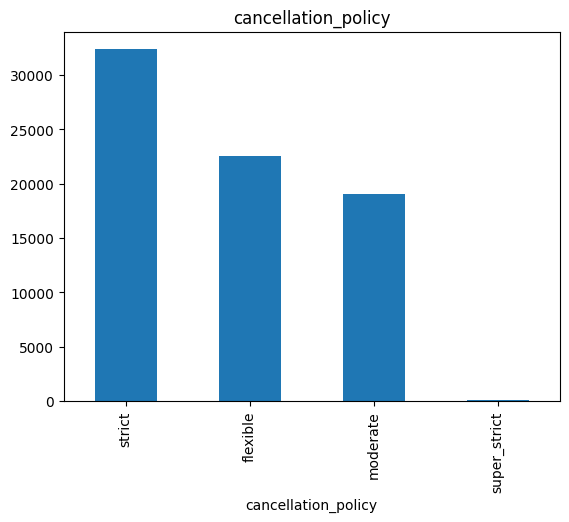

In [37]:
# Fitur cancellation_policy
feature = categorical[3]
count = df_pandas[feature].value_counts()
percent = 100*df_pandas[feature].value_counts(normalize=True)
df_cancel = pd.DataFrame({'jumlah sample':count, 'persentase':percent.round(1)})
print(df_cancel)
count.plot(kind='bar', title=feature)

Terdapat **4 kategori** pada fitur Cancellation Policy, secara berurutan dari jumlahnya yang paling banyak yaitu Strict, Flexible, Moderate, dan Super Strict. Dari data persentase dapat disimpulkan bahwa sebagian besar property memiliki aturan pembatalan yang cukup ketat atau **strict (43.7%)**. Namun, terdapat beberapa property yang memberlakukan aturan pembatalan yang **flexible (30.4%)** dan **moderate(25.7%)**. Properti yang menetapkan aturan pembatalan** sangat ketat** hanya sebagian kecil dari keseluruhan properti yang ada **(0.2%)**.

         jumlah sample  persentase
city                              
NYC              32349        43.6
LA               22453        30.3
SF                6434         8.7
DC                5688         7.7
Chicago           3719         5.0
Boston            3468         4.7


<Axes: title={'center': 'city'}, xlabel='city'>

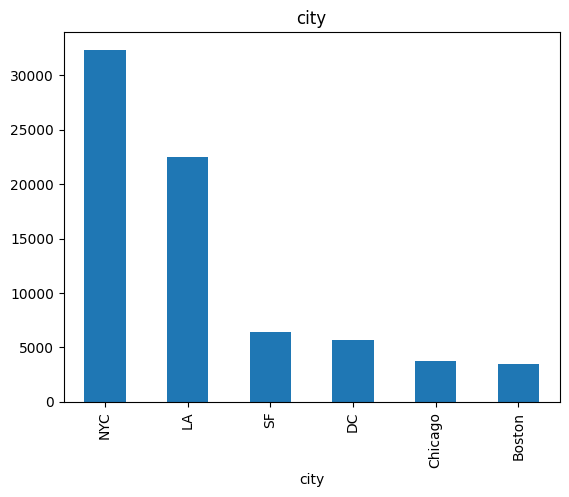

In [38]:
# Fitur city
feature = categorical[4]
count = df_pandas[feature].value_counts()
percent = 100*df_pandas[feature].value_counts(normalize=True)
df_city = pd.DataFrame({'jumlah sample':count, 'persentase':percent.round(1)})
print(df_city)
count.plot(kind='bar', title=feature)

Pada dataset Airbnb Price, terdapat **6 kategori** kota yang dianalisis, secara berurutan dari jumlahnya yang paling banyak yaitu NYC (New York City), LA (Los Angeles), SF (San Fransisco), DC (District of Columbia), Chicago, dan Boston. Dari data persentase dapat disimpulkan bahwa sebagian besar property berada di kota **NYC (43.6%)** dan LA **(30.3%)**.

                        jumlah sample  persentase
host_identity_verified                           
t                               49936        67.4
f                               24175        32.6


<Axes: title={'center': 'host_identity_verified'}, xlabel='host_identity_verified'>

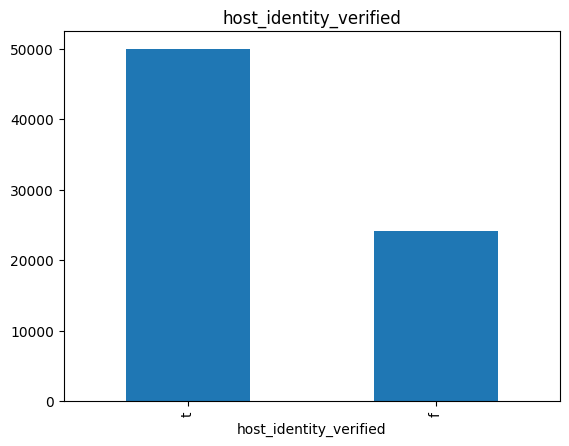

In [39]:
# Fitur host_identify_verified
feature = categorical[5]
count = df_pandas[feature].value_counts()
percent = 100*df_pandas[feature].value_counts(normalize=True)
df_identity = pd.DataFrame({'jumlah sample':count, 'persentase':percent.round(1)})
print(df_identity)
count.plot(kind='bar', title=feature)

Terdapat **2 kategori** pada fitur Host Identify Verified, secara berurutan dari jumlahnya yang paling banyak yaitu True dan False. Dari data persentase dapat disimpulkan bahwa **67.4%** pemilik properti telah memverifikasi identitas mereka, sedangkan **32.6%** lainnya belum memverifikasi identitas mereka.

                  jumlah sample  persentase
instant_bookable                           
f                         54660        73.8
t                         19451        26.2


<Axes: title={'center': 'instant_bookable'}, xlabel='instant_bookable'>

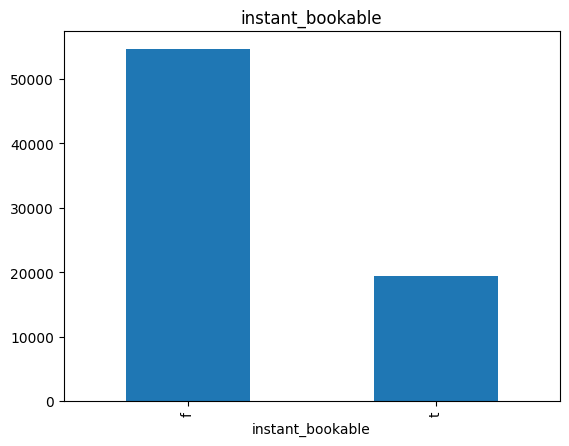

In [40]:
# Fitur instant_bookable
feature = categorical[6]
count = df_pandas[feature].value_counts()
percent = 100*df_pandas[feature].value_counts(normalize=True)
df_instant = pd.DataFrame({'jumlah sample':count, 'persentase':percent.round(1)})
print(df_instant)
count.plot(kind='bar', title=feature)

Terdapat **2 kategori** pada fitur Instant Bookable, secara berurutan dari jumlahnya yang paling banyak yaitu False dan True. Dari data persentase dapat disimpulkan bahwa **73.8%** properti tidak dapat dipesan tanpa persetujuan pemilik, sedangkan **26.2%** lainnya dapat dipesan secara instan tanpa harus menunggu persetujuan pemilik.  

              jumlah sample  persentase
cleaning_fee                           
True                  54403        73.4
False                 19708        26.6


<Axes: title={'center': 'cleaning_fee'}, xlabel='cleaning_fee'>

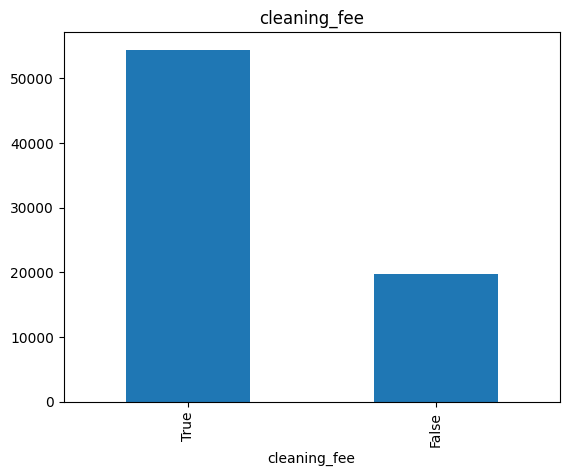

In [41]:
# Fitur cleaning_fee
feature = categorical[7]
count = df_pandas[feature].value_counts()
percent = 100*df_pandas[feature].value_counts(normalize=True)
df_clean = pd.DataFrame({'jumlah sample':count, 'persentase':percent.round(1)})
print(df_clean)
count.plot(kind='bar', title=feature)

Terdapat **2 kategori** pada fitur Cleaning Fee, secara berurutan dari jumlahnya yang paling banyak yaitu True dan False. Dari data persentase dapat disimpulkan bahwa **73.4%** properti memberlakukan tarif untuk kebersihan, sedangkan **26.6%** lainnya tidak memberlakukan tarif untuk kebersihan.  

**Analisis Fitur Numerik** 🔟

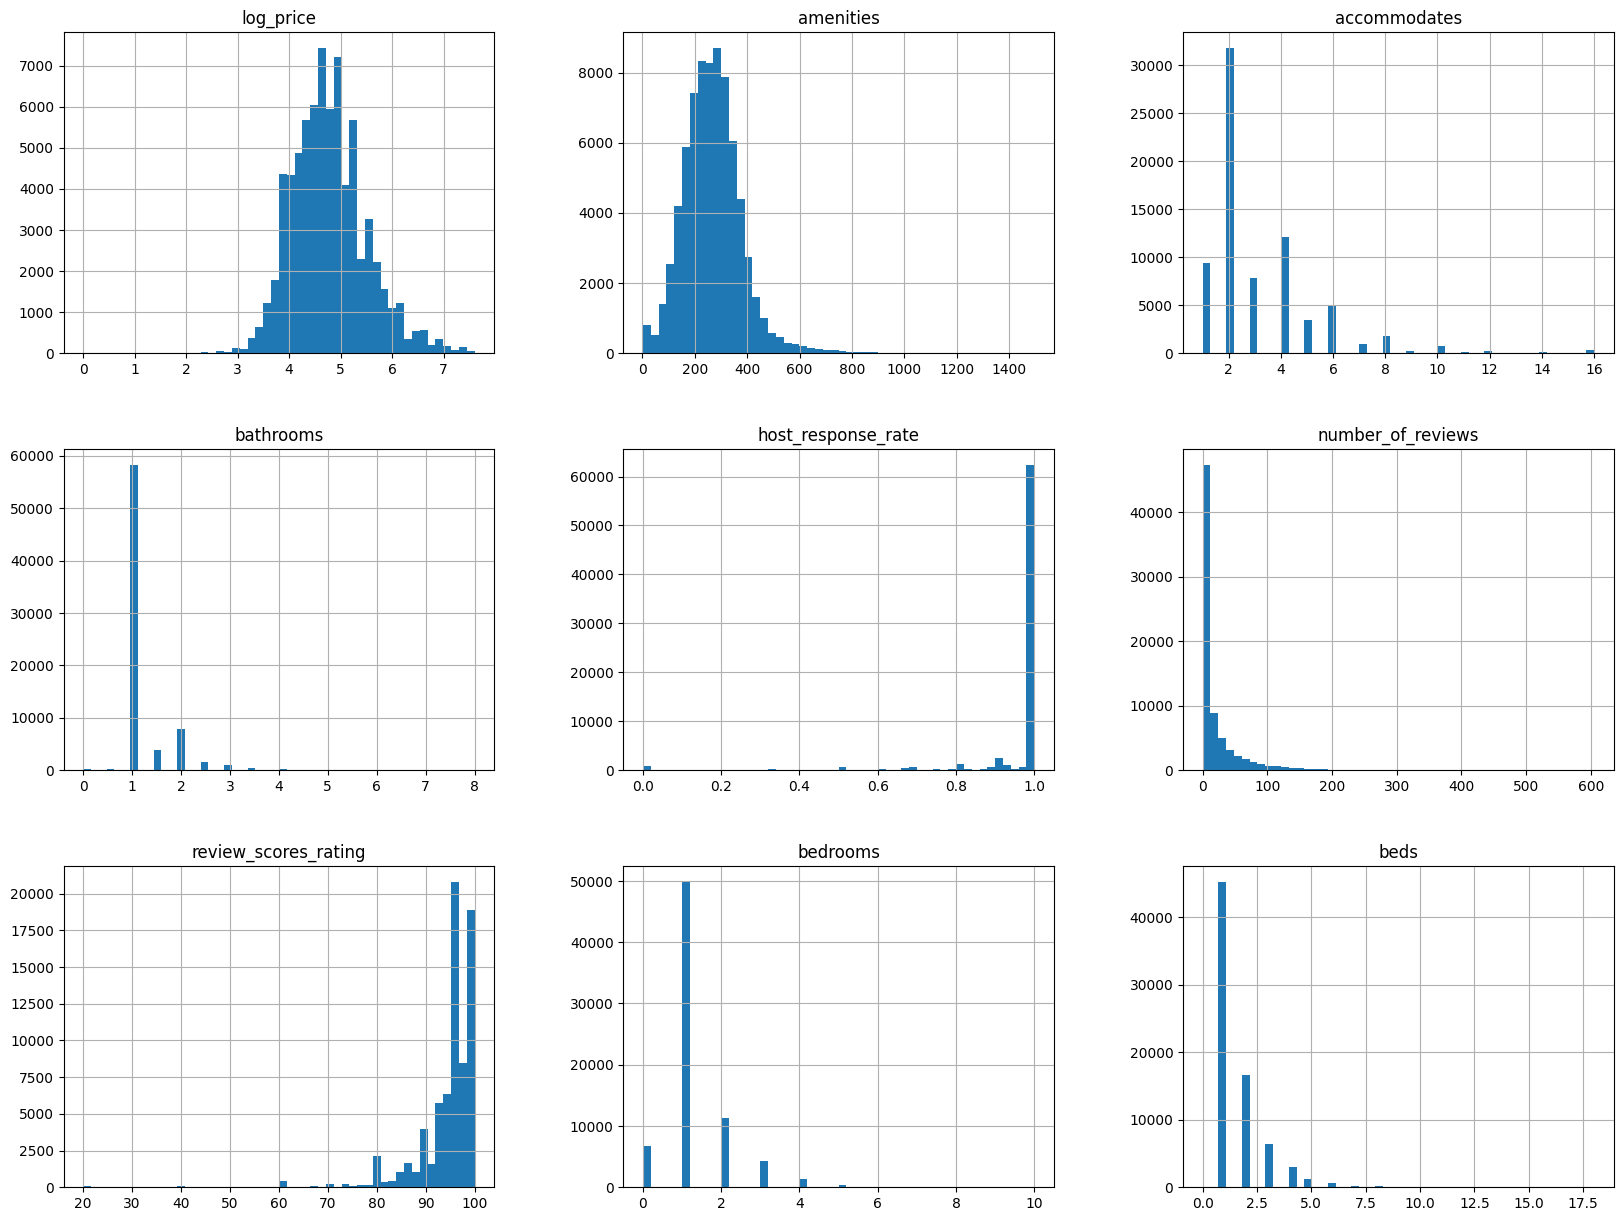

In [42]:
# visualisasi distribusi data numerik
df_pandas.hist(bins=50, figsize=(20, 15))
plt.show()

Dari visualisasi histogram tersebut diketahui bahwa seluruh data pada fitur numerik memiliki kemiringan (skewness) dan **tidak terdistribusi secara normal**.

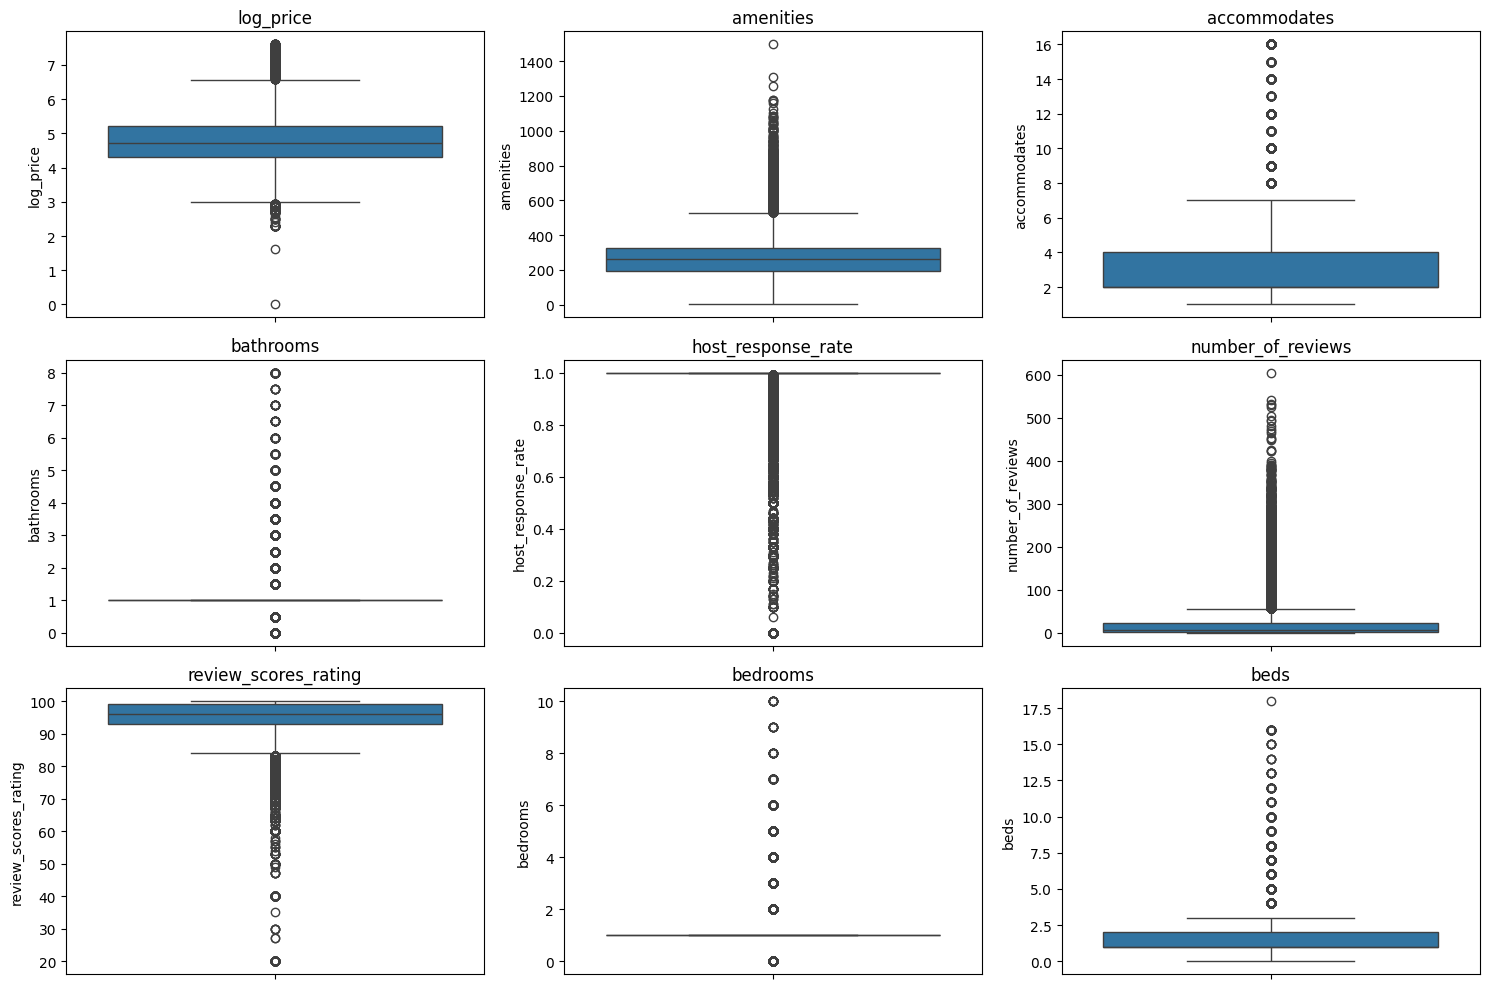

In [43]:
# visualisasi data outlier pada fitur numerik
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15, 10))

for i, ax in enumerate(axs.flatten()):
  sns.boxplot(y=df_pandas.columns[i], data=df_pandas, ax=ax)
  ax.set_title(df_pandas.columns[i])

plt.tight_layout()
plt.show()

Dari visualisasi boxplot tersebut diketahui bahwa seluruh data pada fitur numerik **memiliki outlier**.

Namun pada percobaan ini, adanya kemiringan pada distribusi data dan data outlier akan dipertahankan untuk melihat pengaruhnya terhadap kinerja model.

### **3.2 EDA - Multivariate Analysis** 🔢

**Analisis Fitur Numerik** 🔟

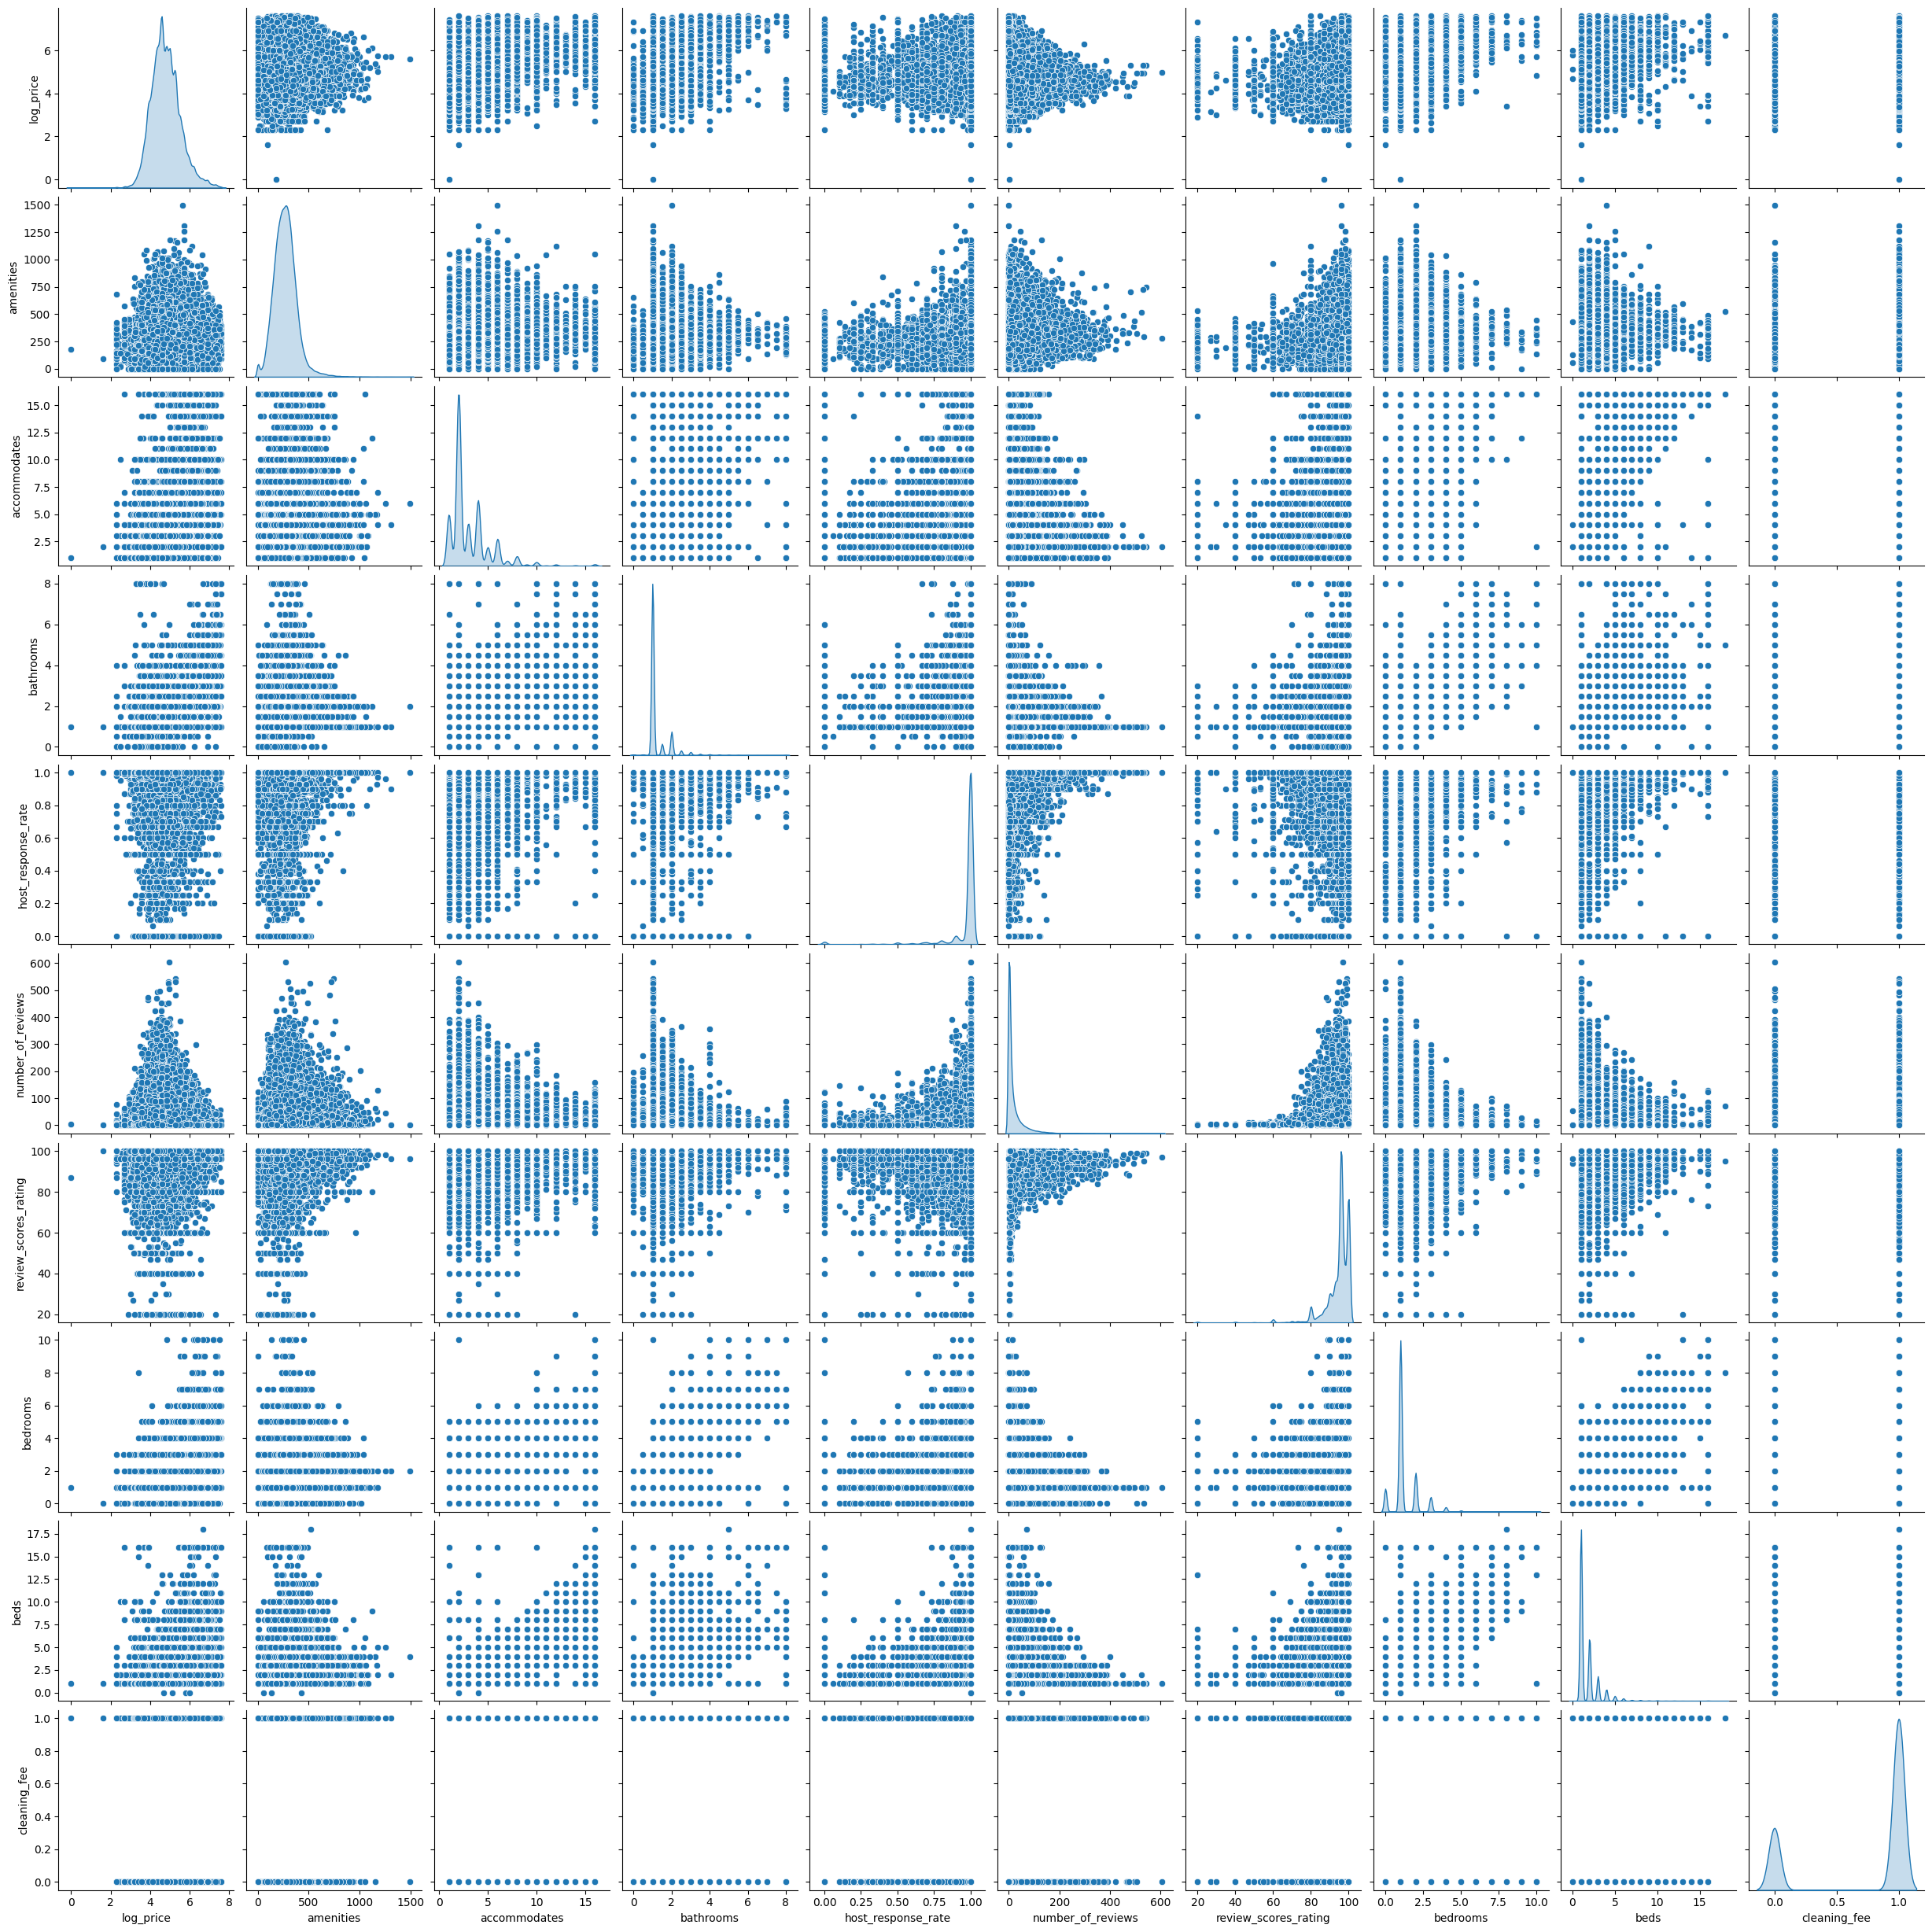

In [44]:
# mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df_pandas, diag_kind='kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

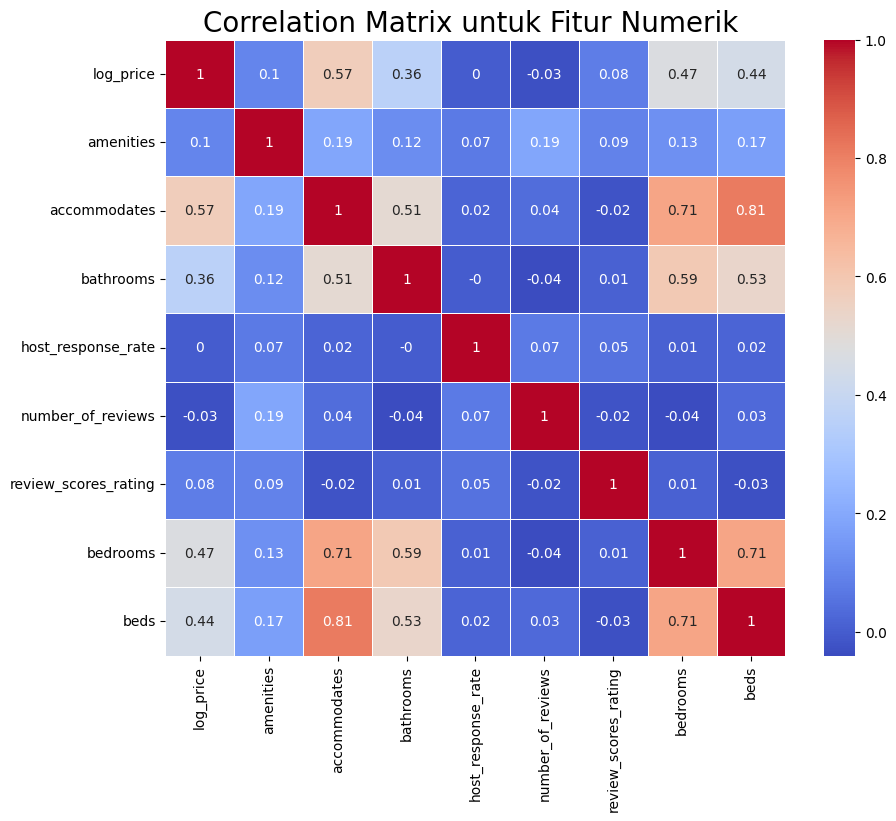

In [45]:
# evaluasi skor korelasi
plt.figure(figsize=(10,8))
correlation_matrix = df_pandas.select_dtypes(include=['number']).corr().round(2)

# print hasil dalam kotak menggunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Berdasarkan visualisasi di atas terdapat beberapa atribut yang menunjukkan adanya hubungan yang kuat antar fitur. Berikur adalah beberapa contoh interpretasi grafik pairplot dan correlation matrix:
*   **Fitur accommodates dengan fitur beds, bedrooms, dan bathrooms memiliki korelasi positif yang sangat kuat**. Hal ini menunjukkan adanya hubungan yang erat antara jumlah tempat tidur, jumlah kamar tidur, dan jumlah kamar mandi dengan banyaknya orang yang bisa ditampung pada sebuah properti.
*   **Fitur log_price dengan fitur beds, bedrooms, dan bathrooms memiliki korelasi positif yang cukup kuat**. Hal ini menunjukkan bahwa semakin banyak jumlah tempat tidur, jumlah kamar tidur, dan jumlah kamar mandi maka semakin mahal harga sebuah properti. Semakin lengkap fasilitas yang dimiliki sebuah properti, maka harganya akan semakin mahal.
* **Fitur number_of_reviews dengan fitur amenities, dan accommodates memiliki korelasi positif yang lemah.** Hal ini menunjukkan bahwa banyaknya fasilitas dan kapasitas properti tidak memiliki hubungan erat dengan jumlah review .
* **Fitur log_price dengan fitur number_of_reviews berkorelasi negatif**. Hal ini menunjukkan bahwa semakin mahal harga sebuah properti maka jumlah review yang diterima cenderung menurun.



**Analisis Fitur Kategorikal** ⭕

<ipython-input-46-44f6f19fadeb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=feature, y='log_price', data=df_pandas, palette='Set3')


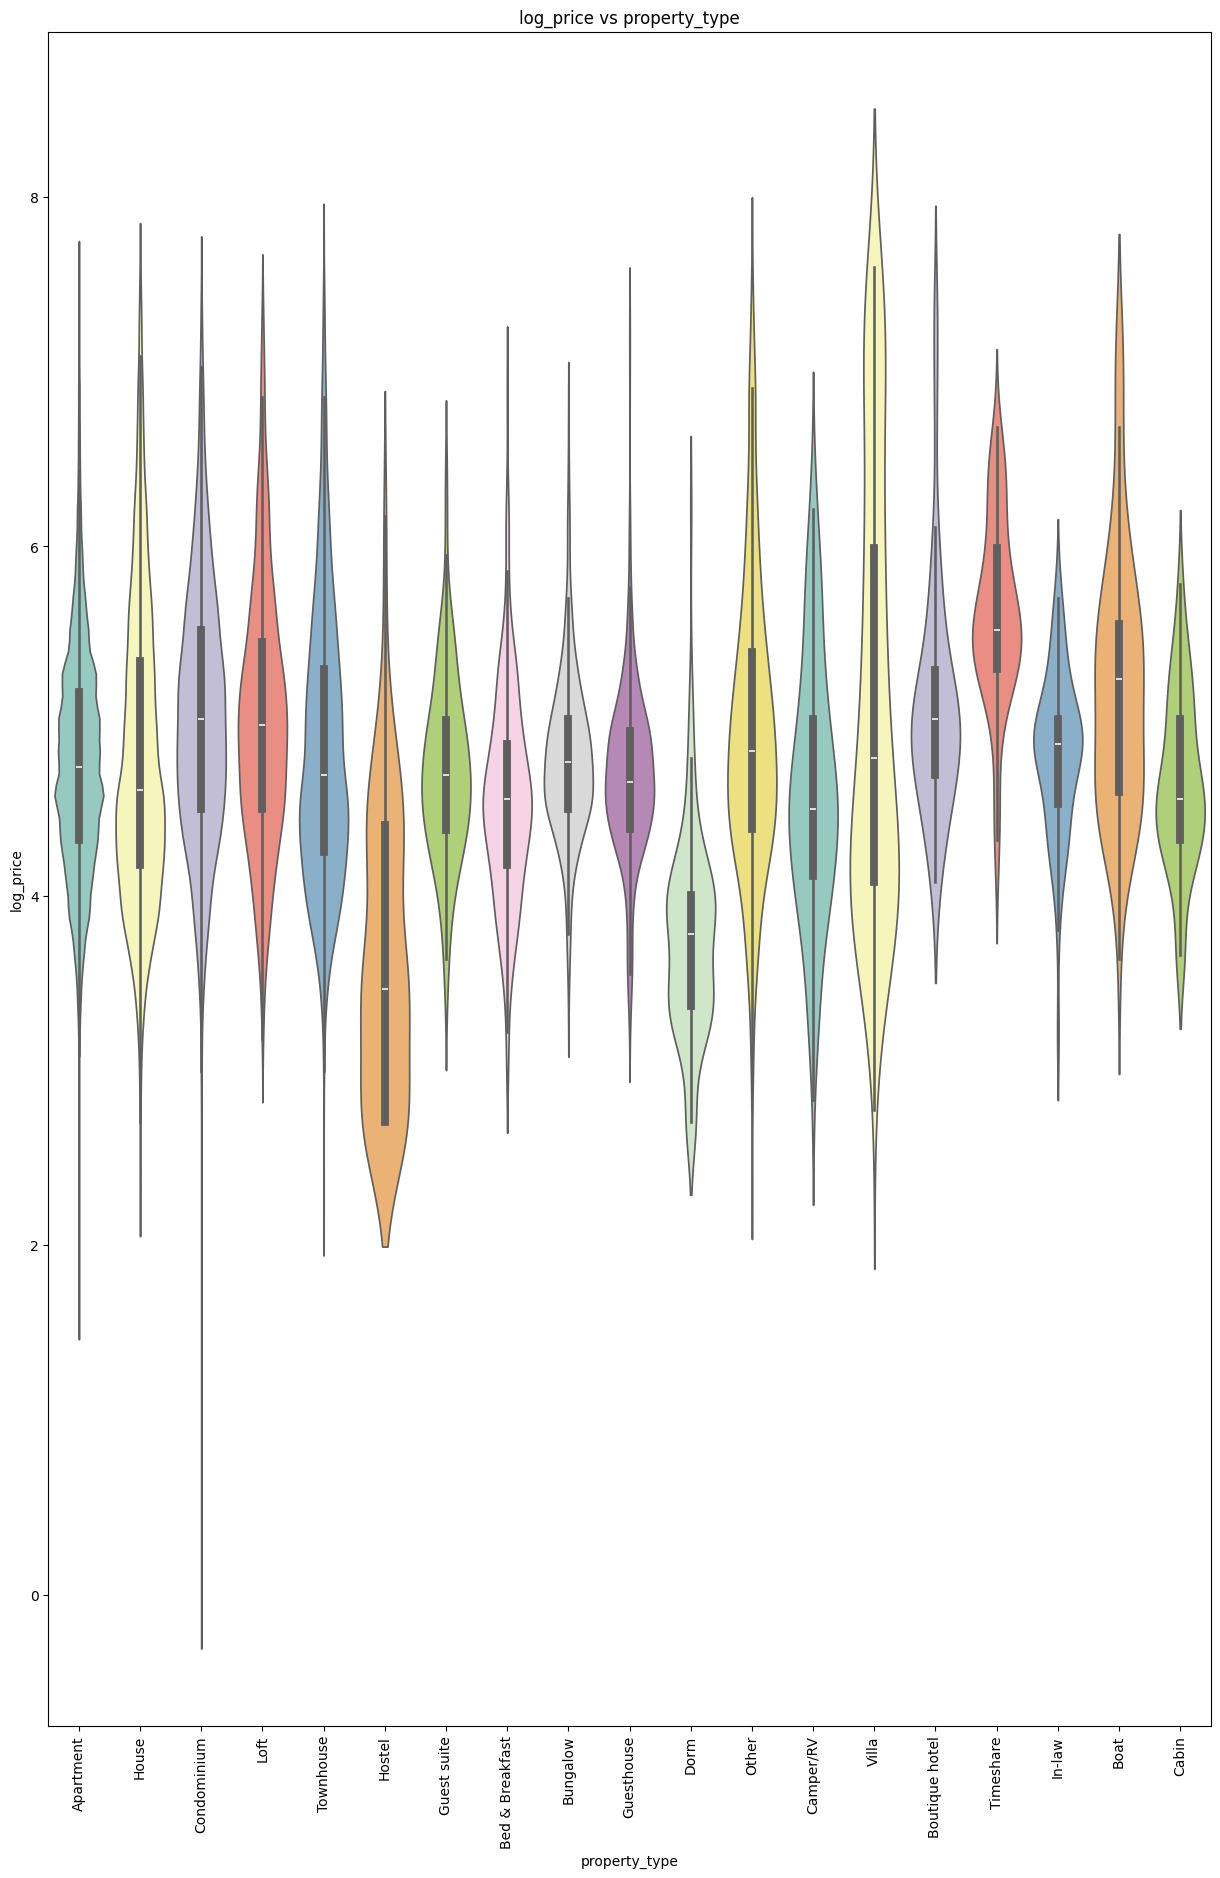

In [46]:
# Fitur property_type
feature = categorical[0]
plt.figure(figsize=(15, 22))
sns.violinplot(x=feature, y='log_price', data=df_pandas, palette='Set3')
plt.title(f"log_price vs {feature}")
plt.xticks(rotation=90)
plt.show()

Dari visualisasi tersebut diketahui bahwa median properti tipe **Timeshare** merupakan yang **paling tinggi**, sedangkan **Hostel** memiliki median yang **paling rendah**. Hal ini menunjukkan bahwa harga Timeshare cenderung lebih tinggi dibanding harga tipe properti lainnya.

<ipython-input-47-176460f06b32>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=feature, y='log_price', data=df_pandas, palette='Set3')


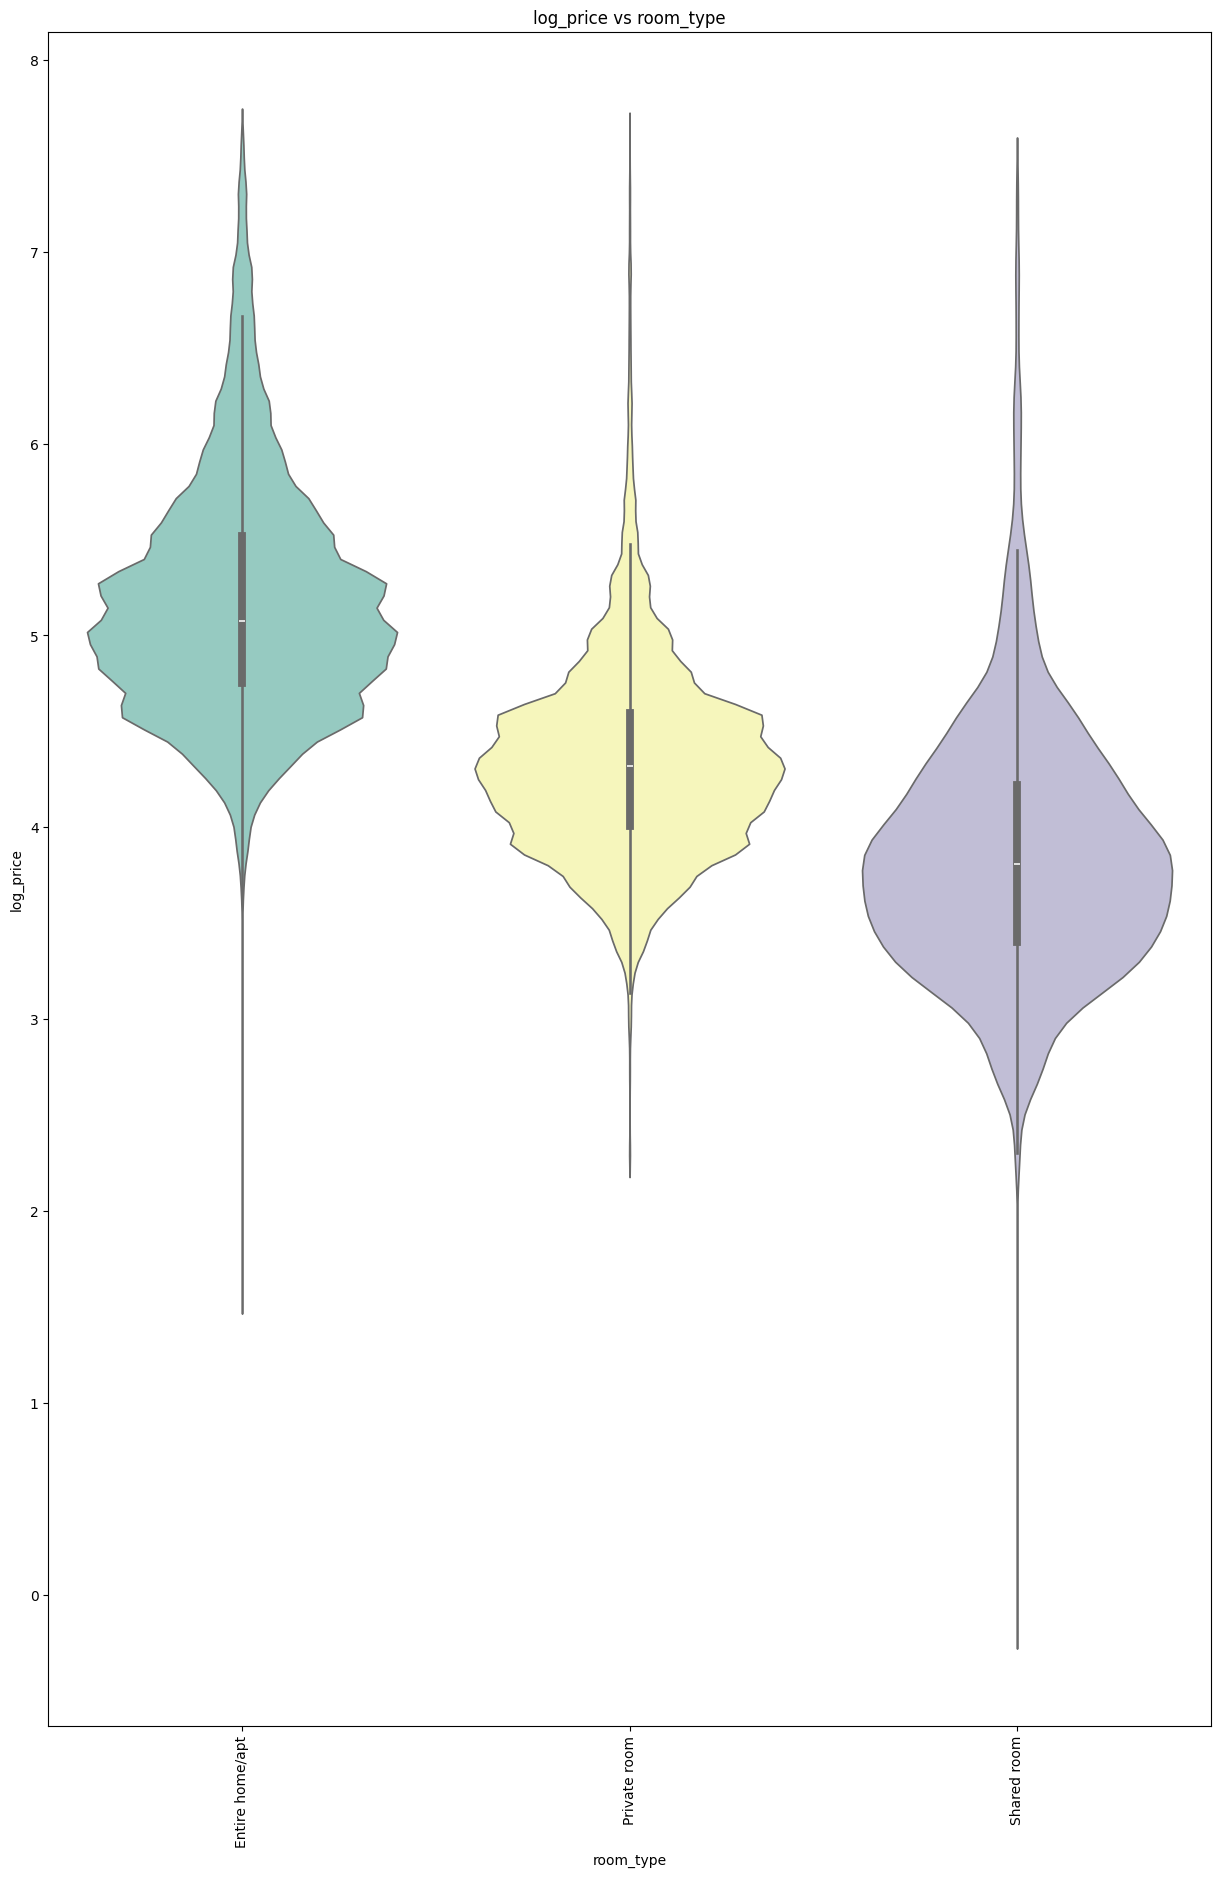

In [47]:
# Fitur room_type
feature = categorical[1]
plt.figure(figsize=(15, 22))
sns.violinplot(x=feature, y='log_price', data=df_pandas, palette='Set3')
plt.title(f"log_price vs {feature}")
plt.xticks(rotation=90)
plt.show()

Dari visualisasi tersebut diketahui bahwa ruangan bertipe **Entire home/apt** memiliki median yang **paling tinggi** dibandingkan tipe ruang lainnya. Sedangkan ruangan bertipe **Shared room** memiliki median yang **paling rendah**. Hal ini menunjukkan bahwa harga tipe ruangan entire home/apt cenderung lebih tinggi, sedangkan harga tipe ruangan shared room cenderung rendah.

<ipython-input-48-89792bb55da9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=feature, y='log_price', data=df_pandas, palette='Set3')


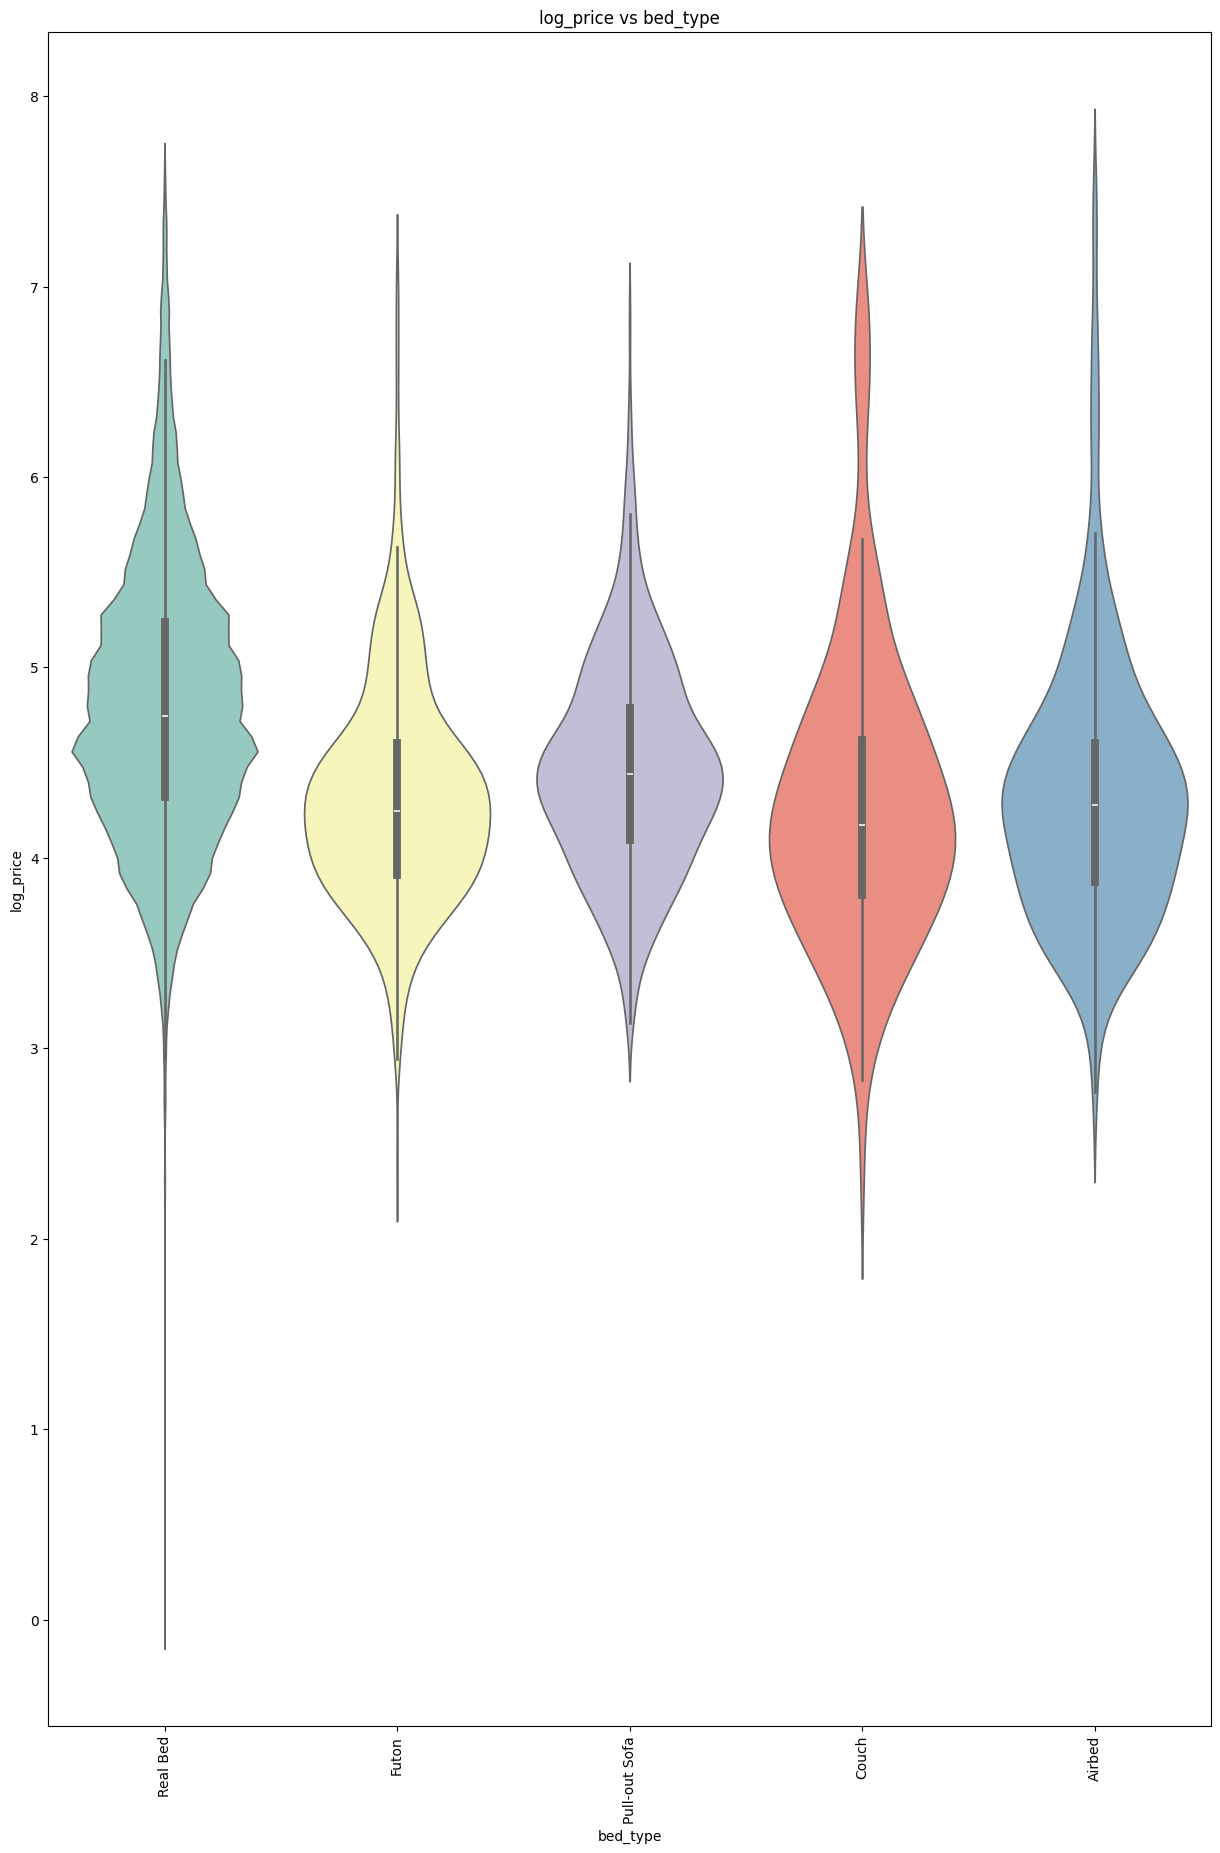

In [48]:
# Fitur bed_type
feature = categorical[2]
plt.figure(figsize=(15, 22))
sns.violinplot(x=feature, y='log_price', data=df_pandas, palette='Set3')
plt.title(f"log_price vs {feature}")
plt.xticks(rotation=90)
plt.show()

Dari visualisasi tersebut diketahui bahwa tempat tidur bertipe **Real bed** memiliki median yang **paling tinggi** dibandingkan tipe tempat tidur lainnya. Sedangkan tempat tidur bertipe **Futon** dan **Couch** memiliki median yang **paling rendah**. Namun, dalam visualisasi tersebut perbedaan median antar setiap tipe tempat tidur tidak terlalu besar. Hal ini menunjukkan bahwa setiap tipe tempat tidur memiliki harga yang cenderung sama.

<ipython-input-49-52a903eaef49>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=feature, y='log_price', data=df_pandas, palette='Set3')


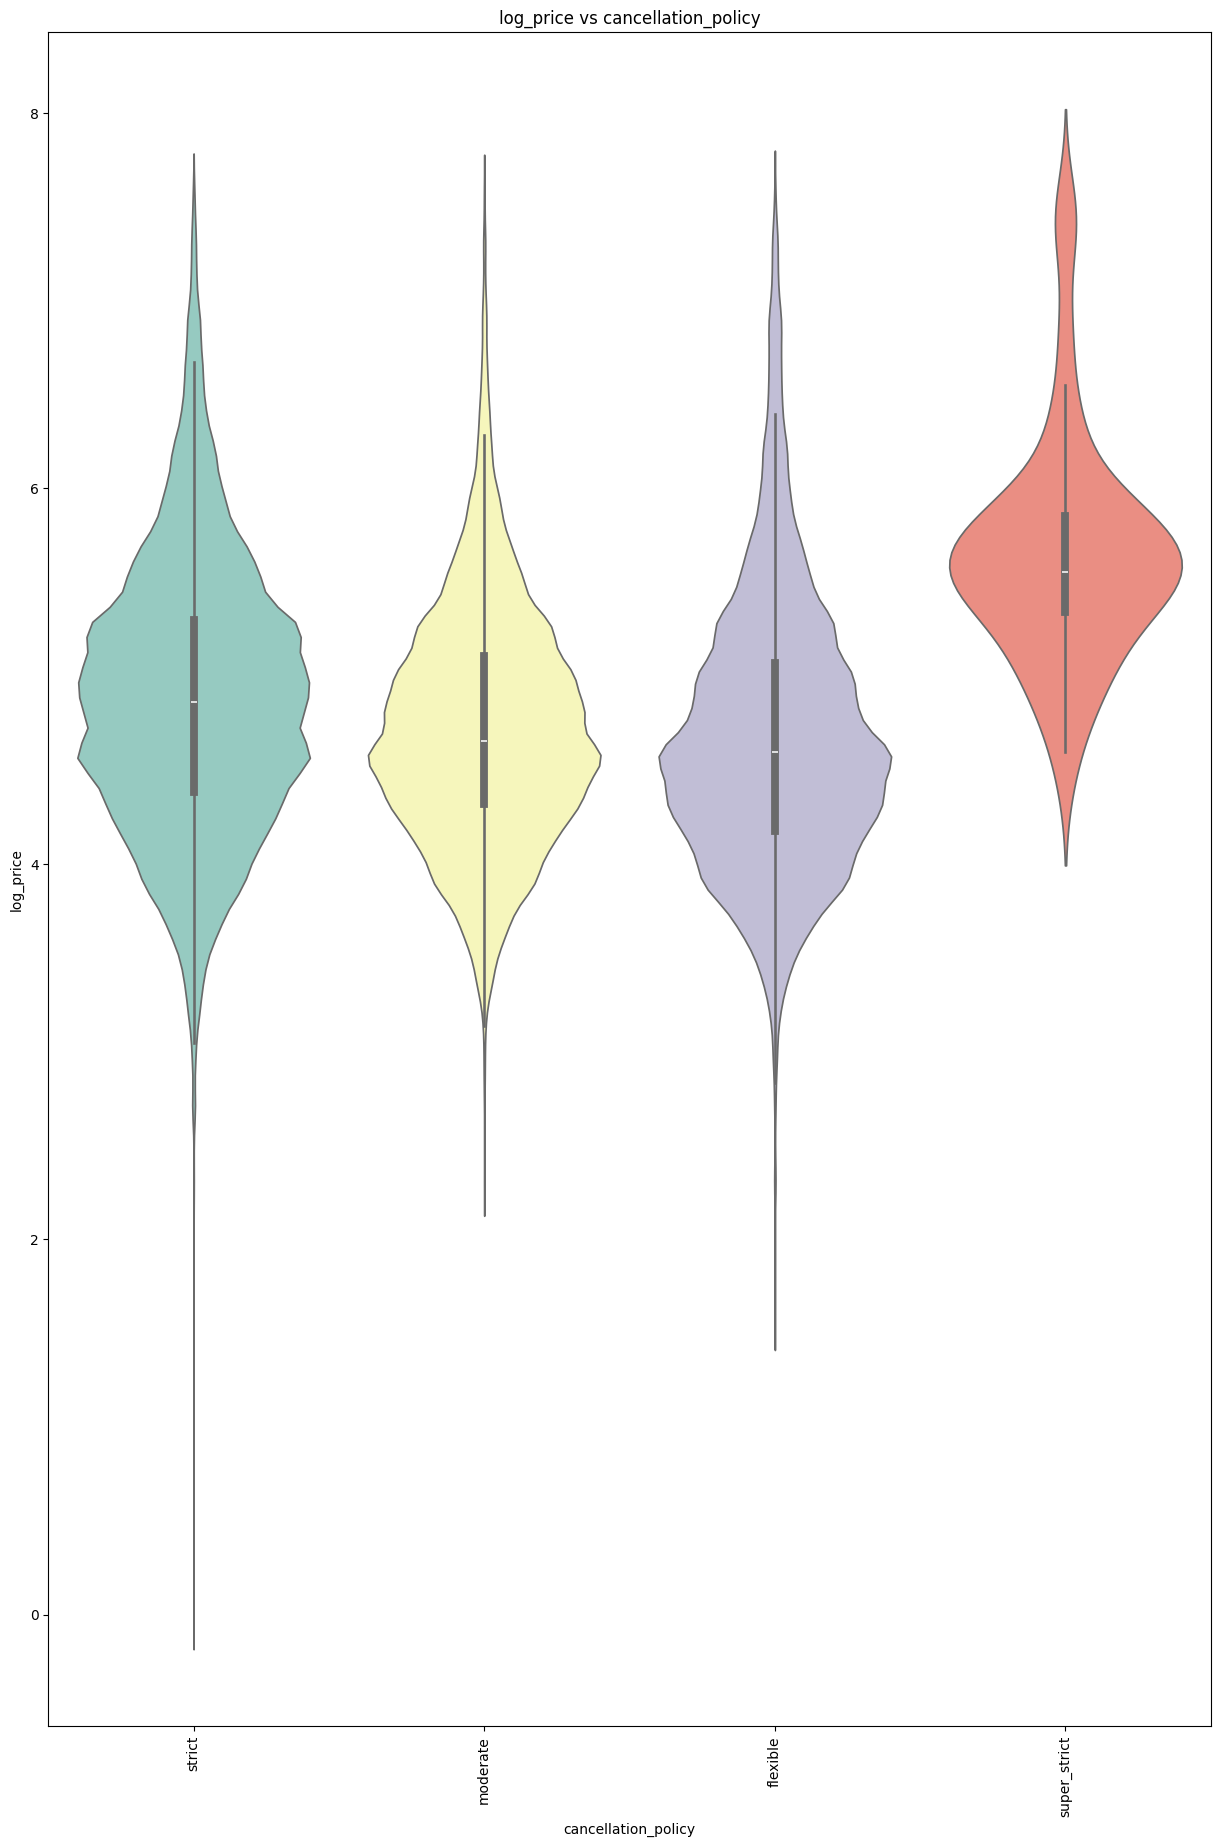

In [49]:
# Fitur cancellation_policy
feature = categorical[3]
plt.figure(figsize=(15, 22))
sns.violinplot(x=feature, y='log_price', data=df_pandas, palette='Set3')
plt.title(f"log_price vs {feature}")
plt.xticks(rotation=90)
plt.show()

Dari visualisasi tersebut diketahui bahwa properti yang menerapkan aturan pembatalan **super ketat (super strict)** memiliki median yang **paling tinggi**. Hal ini menunjukkan bahwa setiap properti yang menerapkan aturan pembatalan sangat ketat memiliki harga yang cenderung tinggi jika dibandingkan dengan properti yang menerapkan aturan pembatalan berbeda.

<ipython-input-50-9c3e13bf436b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=feature, y='log_price', data=df_pandas, palette='Set3')


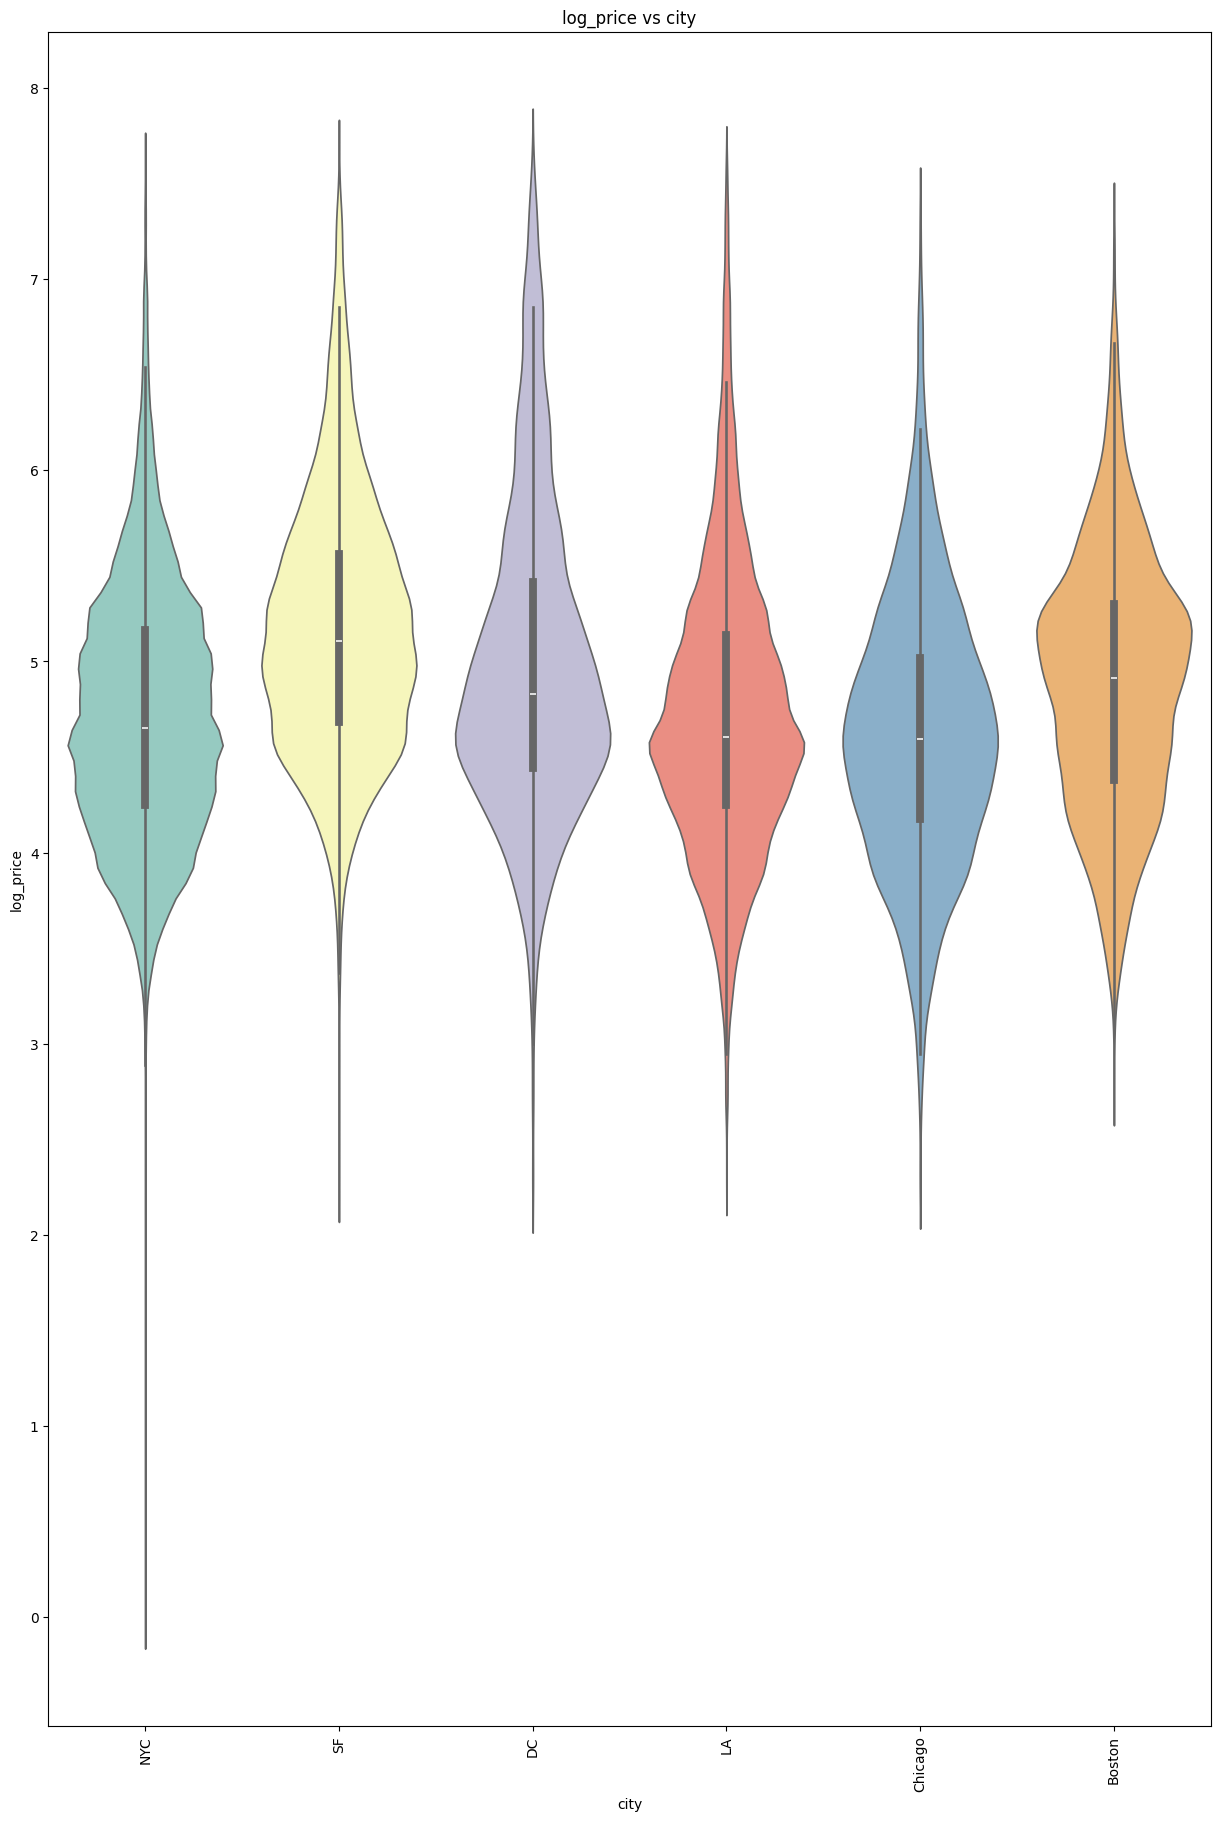

In [50]:
# Fitur city
feature = categorical[4]
plt.figure(figsize=(15, 22))
sns.violinplot(x=feature, y='log_price', data=df_pandas, palette='Set3')
plt.title(f"log_price vs {feature}")
plt.xticks(rotation=90)
plt.show()

Dari visualisasi tersebut diketahui bahwa properti yang berada di kota **San Fransisco** memiliki median yang **paling tinggi**. Hal ini menunjukkan bahwa properti yang berada di San Fransisco memiliki harga yang cenderung tinggi jika dibandingkan dengan properti di kota-kota lain.

<ipython-input-51-5c0e17e91523>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=feature, y='log_price', data=df_pandas, palette='Set3')


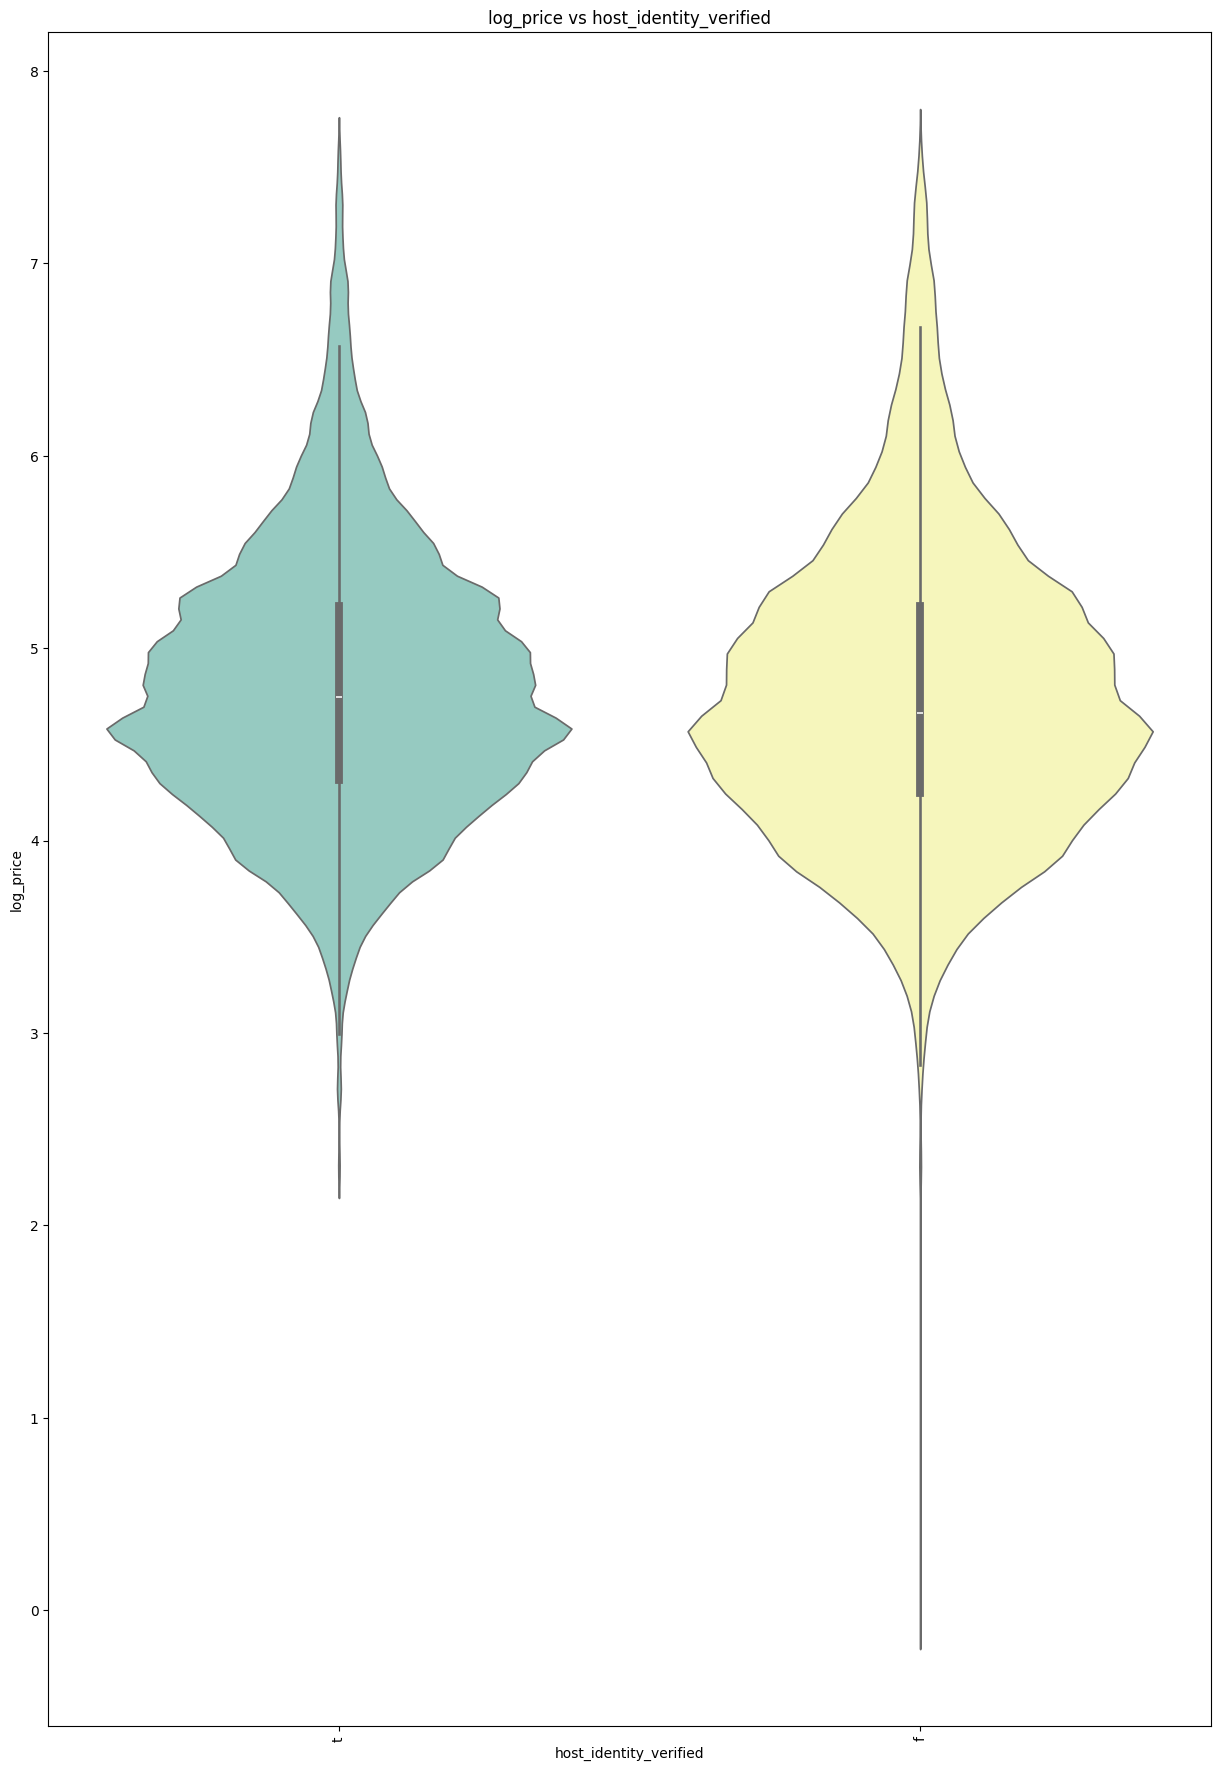

In [51]:
# Fitur host_identity_verified
feature = categorical[5]
plt.figure(figsize=(15, 22))
sns.violinplot(x=feature, y='log_price', data=df_pandas, palette='Set3')
plt.title(f"log_price vs {feature}")
plt.xticks(rotation=90)
plt.show()

Dari visualisasi tersebut diketahui bahwa properti dengan **pemilik yang sudah terverifikasi** memiliki median yang **lebih tinggi** dibading properti dengan **pemilik yang tidak terverifikasi**. Namun, visualisasi tersebut juga menunjukkan bahwa perbedaan median antara kedua kategori tersebut tidak terlalu besar, sehingga menimbulkan interpretasi bahwa harga untuk kedua kategori tersebut cenderung sama.

<ipython-input-52-7348087a0cc3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=feature, y='log_price', data=df_pandas, palette='Set3')


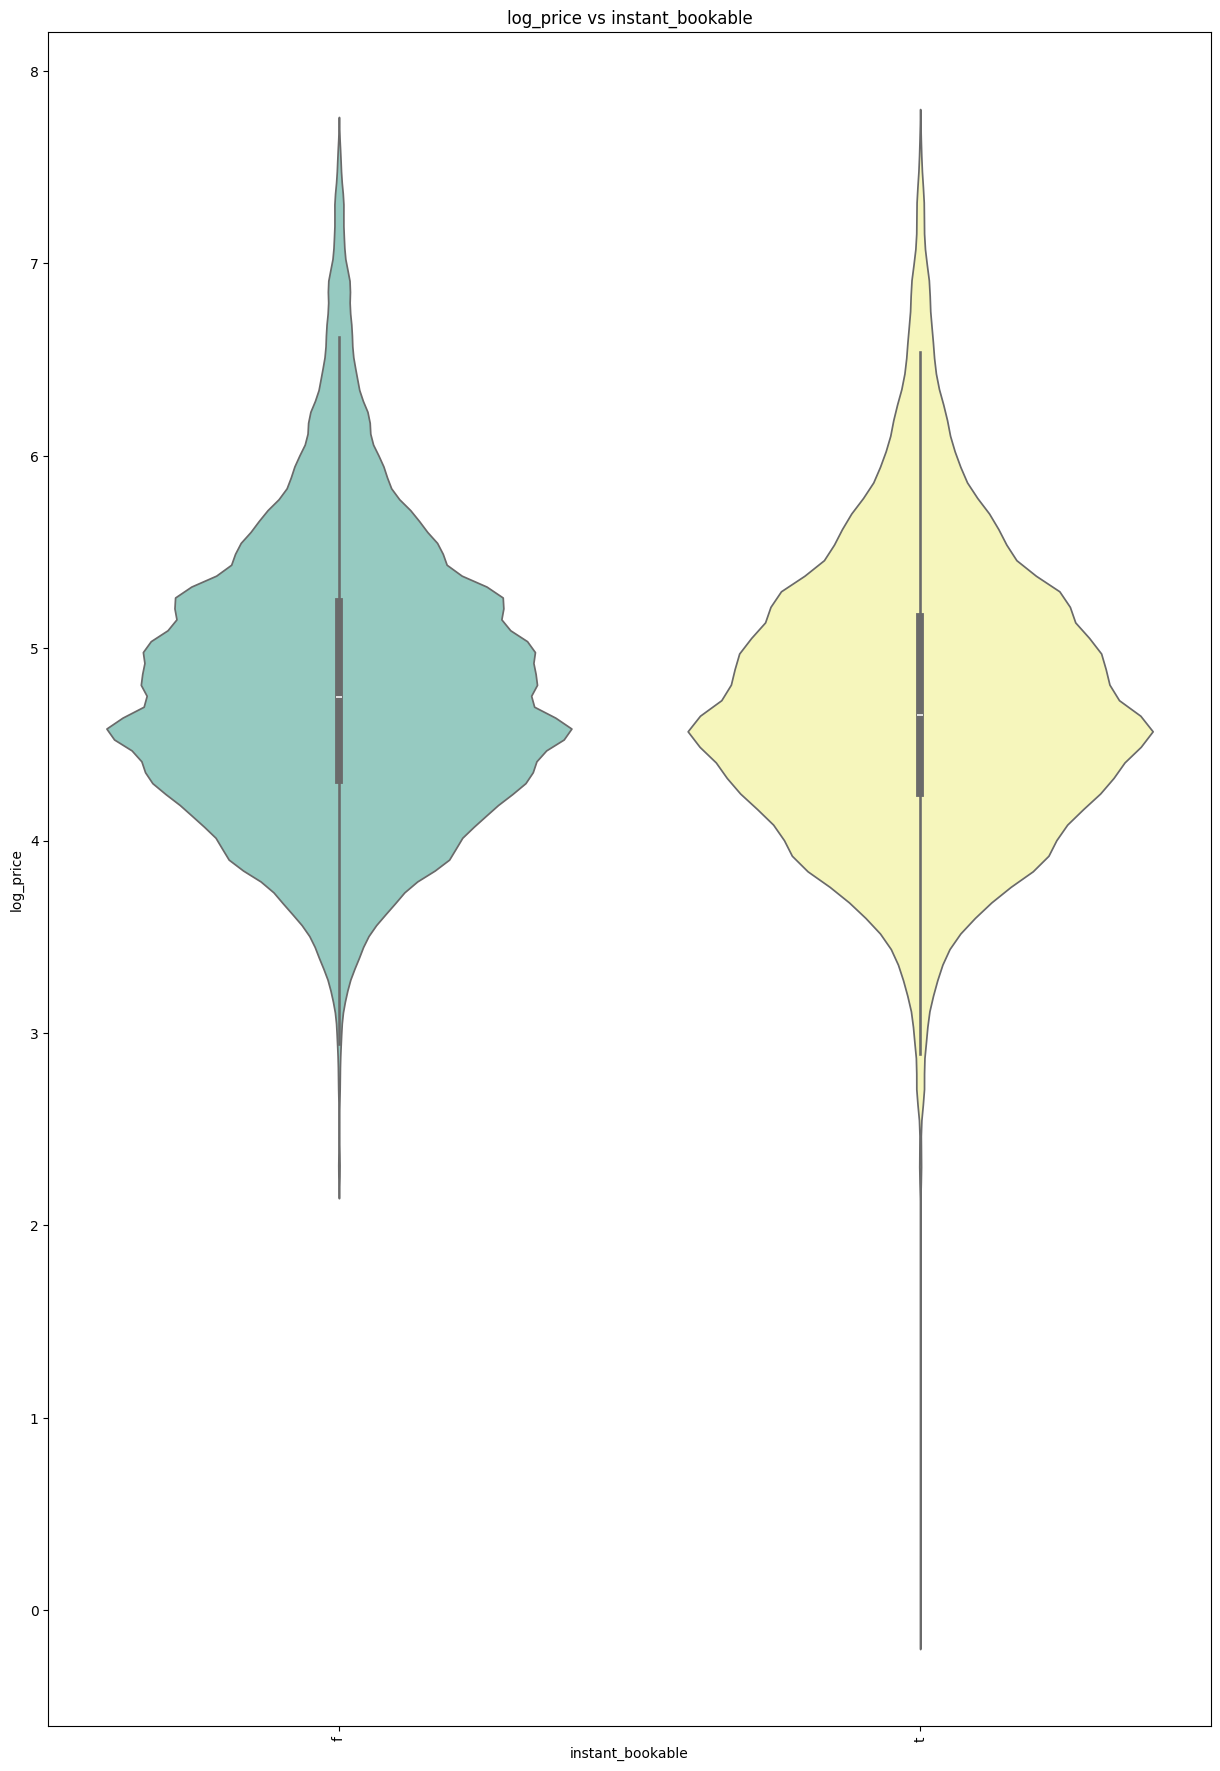

In [52]:
# Fitur instant_bookable
feature = categorical[6]
plt.figure(figsize=(15, 22))
sns.violinplot(x=feature, y='log_price', data=df_pandas, palette='Set3')
plt.title(f"log_price vs {feature}")
plt.xticks(rotation=90)
plt.show()

Dari visualisasi tersebut diketahui bahwa properti dengan kebjikan **instant booking** dan kebijakan **non-instant booking** memiliki median yang cenderung sama. Hal ini menunjukkan bahwa harga untuk kedua kategori tersebut cenderung sama.

<ipython-input-53-0ace81bdc384>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=feature, y='log_price', data=df_pandas, palette='Set3')


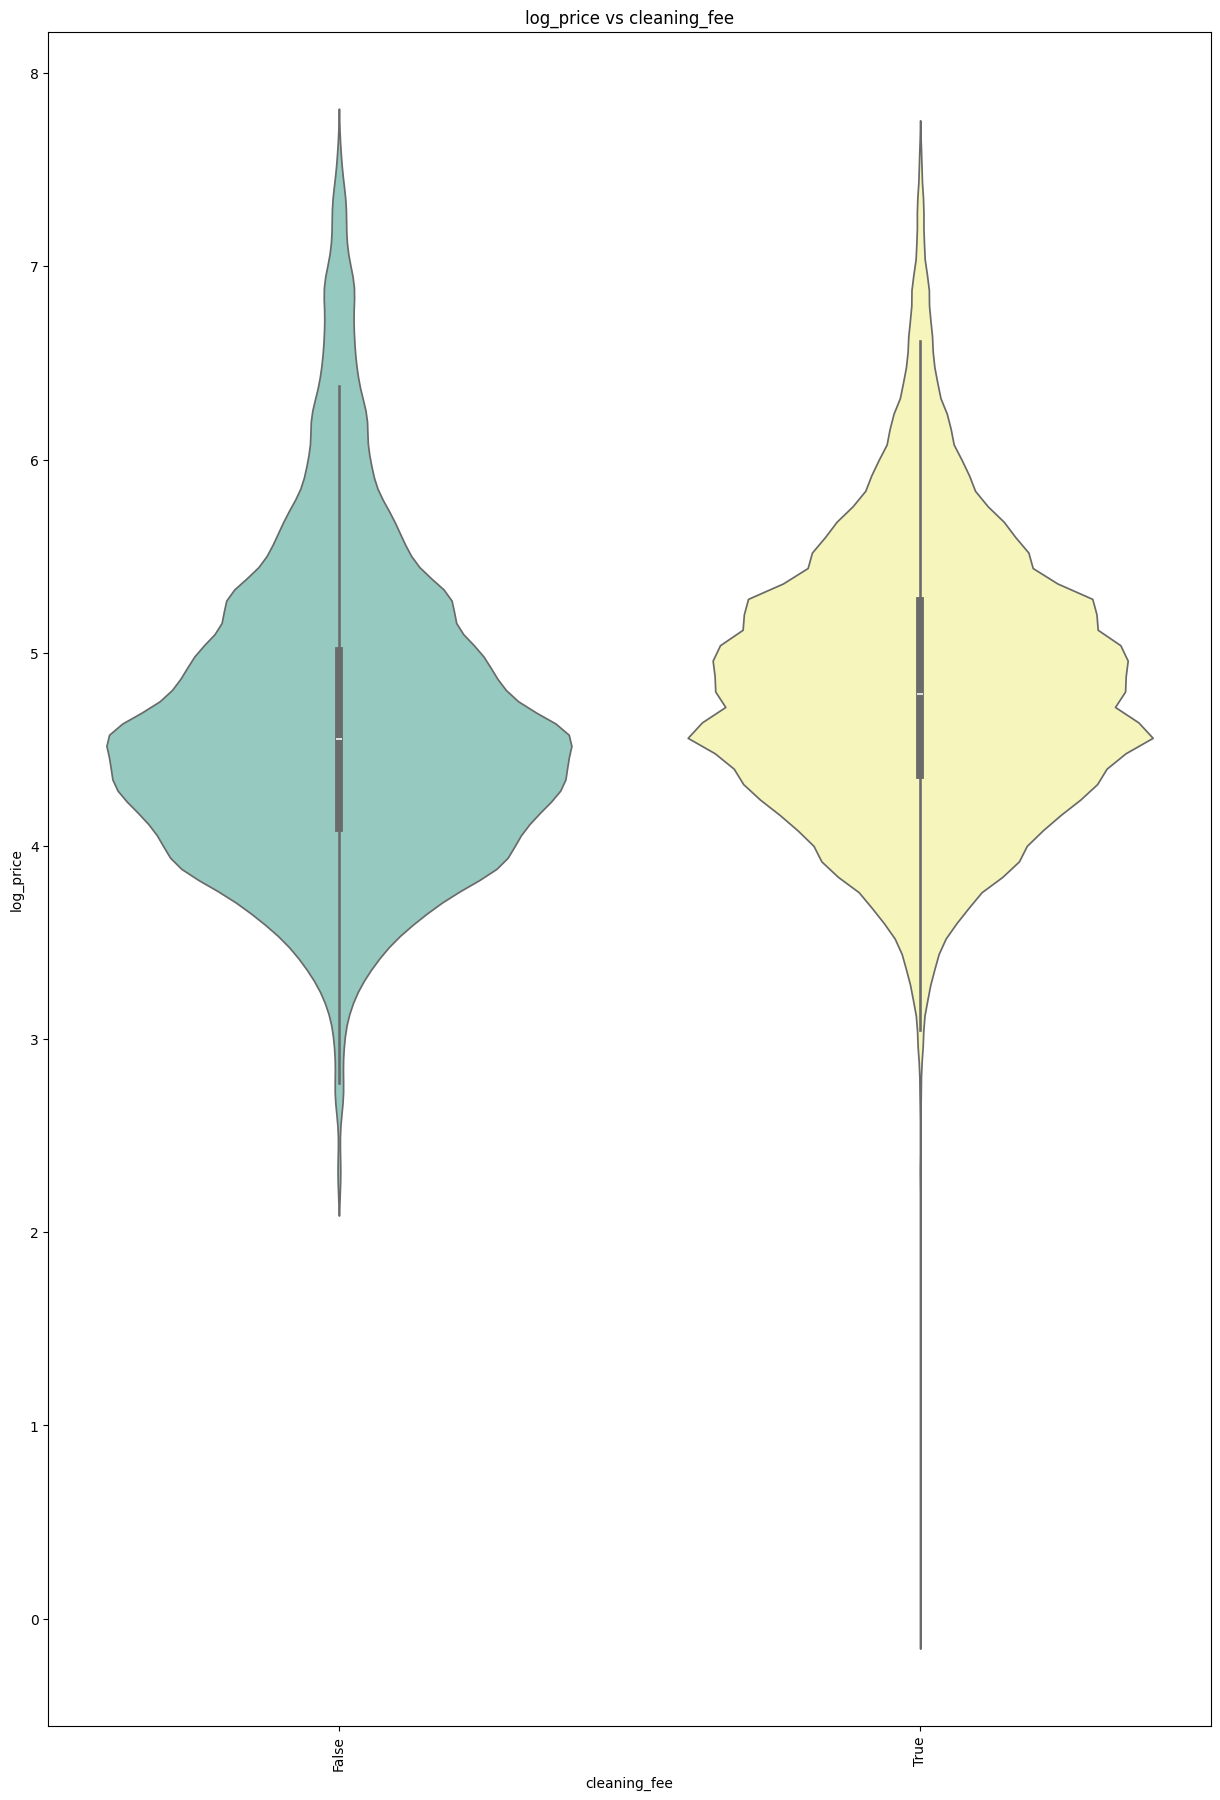

In [53]:
# Fitur cleaning_fee
feature = categorical[7]
plt.figure(figsize=(15, 22))
sns.violinplot(x=feature, y='log_price', data=df_pandas, palette='Set3')
plt.title(f"log_price vs {feature}")
plt.xticks(rotation=90)
plt.show()

Dari visualisasi tersebut diketahui bahwa properti yang **menerapkan tarif untuk kebersihan** memiliki median yang **lebih tinggi** dibandingkan **properti yang tidak menerapkan tarif untuk kebersihan**. Hal ini menunjukkan bahwa harga untuk properti yang menerapkan tarif kebersihan cenderung lebih tinggi.

## **4. Pemodelan Analitik** 🤖

### **4.1 Encoding Fitur Kategori** ⛓️‍💥

In [54]:
# buat copy baru
df_baru = df.toPandas()

In [55]:
# One hot encoding fitur kategorikal
categorical = df_baru.select_dtypes(include=['object', 'bool']).columns.to_list()

for col in categorical:
  df_baru = pd.concat([df_baru, pd.get_dummies(df_baru[col], prefix=col, dtype=int)], axis=1)
  df_baru = df_baru.drop([col], axis=1)

In [56]:
df_baru

,log_price,amenities,accommodates,bathrooms,host_response_rate,number_of_reviews,review_scores_rating,bedrooms,beds,property_type_Apartment,...,city_DC,city_LA,city_NYC,city_SF,host_identity_verified_f,host_identity_verified_t,instant_bookable_f,instant_bookable_t,cleaning_fee_False,cleaning_fee_True
0,5.010635,152.0,3.0,1.0,1.0,2.0,100.0,1.0,1.0,1,...,0,0,1,0,0,1,1,0,0,1
1,5.129899,218.0,7.0,1.0,1.0,6.0,93.0,3.0,3.0,1,...,0,0,1,0,1,0,0,1,0,1
2,4.976734,311.0,5.0,1.0,1.0,10.0,92.0,1.0,3.0,1,...,0,0,1,0,0,1,0,1,0,1
3,6.620073,210.0,4.0,1.0,1.0,0.0,96.0,2.0,2.0,0,...,0,0,0,1,0,1,1,0,0,1
4,4.744932,174.0,2.0,1.0,1.0,4.0,40.0,0.0,1.0,1,...,1,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,4.605170,2.0,1.0,1.0,1.0,0.0,96.0,1.0,1.0,1,...,0,0,1,0,0,1,1,0,1,0
74107,5.043425,224.0,4.0,2.0,1.0,16.0,93.0,2.0,4.0,1,...,0,1,0,0,1,0,1,0,0,1
74108,5.220356,402.0,5.0,1.0,1.0,43.0,94.0,2.0,2.0,1,...,0,0,1,0,0,1,0,1,0,1
74109,5.273000,189.0,2.0,1.0,1.0,0.0,96.0,0.0,2.0,1,...,0,0,1,0,1,0,0,1,0,1


In [57]:
df_baru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 52 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   log_price                         74111 non-null  float64
 1   amenities                         74111 non-null  float64
 2   accommodates                      74111 non-null  float64
 3   bathrooms                         74111 non-null  float64
 4   host_response_rate                74111 non-null  float64
 5   number_of_reviews                 74111 non-null  float64
 6   review_scores_rating              74111 non-null  float64
 7   bedrooms                          74111 non-null  float64
 8   beds                              74111 non-null  float64
 9   property_type_Apartment           74111 non-null  int64  
 10  property_type_Bed & Breakfast     74111 non-null  int64  
 11  property_type_Boat                74111 non-null  int64  
 12  prop

Output di atas menunjukkan data yang akan digunakan untuk pembuatan model setelah dilakukan **one-hot-encoding** terdiri dari **74111 baris** data dan **52 kolom** bertipe float dan integer.

In [58]:
# simpan hasil one-hot-encoding ke dalam Spark dataframe
df_spark_baru = spark.createDataFrame(df_baru)

In [59]:
df_spark_baru.show()

+------------------+---------+------------+---------+------------------+-----------------+--------------------+--------+----+-----------------------+-----------------------------+------------------+----------------------------+----------------------+-------------------+-----------------------+-------------------------+------------------+-------------------------+------------------------+--------------------+-------------------+--------------------+------------------+-------------------+-----------------------+-----------------------+-------------------+-------------------------+----------------------+---------------------+---------------+--------------+--------------+----------------------+-----------------+----------------------------+----------------------------+--------------------------+--------------------------------+-----------+------------+-------+-------+--------+-------+------------------------+------------------------+------------------+------------------+------------------+

Hasil **one-hot-encoding** dalam bentuk pandas dataframe kembali disimpan dalam dalam **Spark Dataframe**.

### **4.2 Train-Test-Split** 🔏

**Split Dataset** ✂

In [60]:
# membagi dataset menjadi train, validation, dan test set
train, val, test = df_spark_baru.randomSplit([0.7, 0.2, 0.1], seed=42)

Kode di atas membagi dataset menjadi train set, validation set, dan tes set dengan skenario pembagian dataset 70%:20%:10%

### **4.3 Model Development** 🦿

Pada percobaan ini akan dibuat tiga model untuk memprediksi harga hotel berdasarkan atribut yang dimiliki, yaitu model `LinearRegression`, `DecisionTreeRegressor`, dan `RandomForestRegressor` menggunakan **Spark MLlib** dengan `API pyspark.ml.regression`. Ketiga model ini akan dibandingkan untuk mengetahui model mana yang paling baik dalam memprediksi harga hotel.

In [61]:
# menggabungkan fitur-fitur numerik menjadi satu vektor
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=df_spark_baru.columns[1:], outputCol='features')
train_data = assembler.transform(train)
val_data = assembler.transform(val)
test_data = assembler.transform(test)

**LinearRegression Model** 🗂️

In [62]:
# melatih model menggunakan LinearRegression
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol='features', labelCol='log_price')
lr_model = lr.fit(train_data)

**Decision Tree Model** ⚡

In [63]:
from pyspark.ml.regression import DecisionTreeRegressor

dt = DecisionTreeRegressor(featuresCol='features', labelCol='log_price')
dt_model = dt.fit(train_data)

**Random Forest Model** 🌳

In [64]:
from pyspark.ml.regression import RandomForestRegressor

rf = RandomForestRegressor(featuresCol='features', labelCol='log_price')
rf_model = rf.fit(train_data)

## **5. Evaluasi dan Interpretasi Hasil** 👩🏼‍🏫

Pada percobaan ini, ketiga model akan dievaluasi menggunakan metrik **Mean Absolute Error (MAE)** pada validation set dan test set. Model yang memiliki MAE lebih kecil akan dianggap sebagai model terbaik untuk memprediksi harga hotel.

### **5.1 Evaluasi Model LinearRegression** 🗂️

In [65]:
# evaluasi model LinearRegression pada data validation
from pyspark.ml.evaluation import RegressionEvaluator

lr_predictions_val = lr_model.transform(val_data)
lr_evaluator = RegressionEvaluator(labelCol='log_price', predictionCol='prediction')

# menghitung metrik rmse
rmse_lr_val = lr_evaluator.evaluate(lr_predictions_val, {lr_evaluator.metricName: 'rmse'})
print('RMSE pada data validation:', rmse_lr_val)

# menghitung metrik mae
mae_lr_val = lr_evaluator.evaluate(lr_predictions_val, {lr_evaluator.metricName: 'mae'})
print('MAE pada data validation:', mae_lr_val)

RMSE pada data validation: 0.47632553759140933
MAE pada data validation: 0.35766796999411327


In [66]:
# evaluasi model LinearRegression pada data test
from pyspark.ml.evaluation import RegressionEvaluator

lr_predictions_test = lr_model.transform(test_data)
lr_evaluator = RegressionEvaluator(labelCol='log_price', predictionCol='prediction')

# menghitung metrik rmse
rmse_lr_test = lr_evaluator.evaluate(lr_predictions_test, {lr_evaluator.metricName: 'rmse'})
print('RMSE pada data validation:', rmse_lr_test)

# menghitung metrik mae
mae_lr_test = lr_evaluator.evaluate(lr_predictions_test, {lr_evaluator.metricName: 'mae'})
print('MAE pada data validation:', mae_lr_test)

RMSE pada data validation: 0.47335064744082944
MAE pada data validation: 0.3576416411972841


In [67]:
# menampilkan baris hasil prediksi test data
lr_predictions_test.show()

+------------------+---------+------------+---------+------------------+-----------------+--------------------+--------+----+-----------------------+-----------------------------+------------------+----------------------------+----------------------+-------------------+-----------------------+-------------------------+------------------+-------------------------+------------------------+--------------------+-------------------+--------------------+------------------+-------------------+-----------------------+-----------------------+-------------------+-------------------------+----------------------+---------------------+---------------+--------------+--------------+----------------------+-----------------+----------------------------+----------------------------+--------------------------+--------------------------------+-----------+------------+-------+-------+--------+-------+------------------------+------------------------+------------------+------------------+------------------+

Dari kode di atas diketahui bahwa model `LinearRegression` yang dilatih menggunakan `Spark MLlib` memiliki **MAE 0.3576** pada validation dan test set.

### **5.2 Evaluasi Model Decision Tree** ⚡

In [68]:
# evaluasi model DecisionTreeRegressor pada data validation
from pyspark.ml.evaluation import RegressionEvaluator

dt_predictions_val = dt_model.transform(val_data)
dt_evaluator = RegressionEvaluator(labelCol='log_price', predictionCol='prediction')

# menghitung metrik rmse
rmse_dt_val = dt_evaluator.evaluate(dt_predictions_val, {dt_evaluator.metricName: 'rmse'})
print('RMSE pada data validation:', rmse_dt_val)

# menghitung metrik mae
mae_dt_val = dt_evaluator.evaluate(dt_predictions_val, {dt_evaluator.metricName: 'mae'})
print('MAE pada data validation:', mae_dt_val)

RMSE pada data validation: 0.4791515845830492
MAE pada data validation: 0.35949249399411687


In [69]:
# evaluasi model DecisionTreeRegressor pada data test
from pyspark.ml.evaluation import RegressionEvaluator

dt_predictions_test = dt_model.transform(test_data)
dt_evaluator = RegressionEvaluator(labelCol='log_price', predictionCol='prediction')

# menghitung metrik rmse
rmse_dt_test = dt_evaluator.evaluate(dt_predictions_test, {dt_evaluator.metricName: 'rmse'})
print('RMSE pada data validation:', rmse_dt_test)

# menghitung metrik mae
mae_dt_test = dt_evaluator.evaluate(dt_predictions_test, {dt_evaluator.metricName: 'mae'})
print('MAE pada data validation:', mae_dt_test)

RMSE pada data validation: 0.48276341934054806
MAE pada data validation: 0.3644154826280074


In [70]:
# menampilkan baris hasil prediksi test data
dt_predictions_test.show()

+------------------+---------+------------+---------+------------------+-----------------+--------------------+--------+----+-----------------------+-----------------------------+------------------+----------------------------+----------------------+-------------------+-----------------------+-------------------------+------------------+-------------------------+------------------------+--------------------+-------------------+--------------------+------------------+-------------------+-----------------------+-----------------------+-------------------+-------------------------+----------------------+---------------------+---------------+--------------+--------------+----------------------+-----------------+----------------------------+----------------------------+--------------------------+--------------------------------+-----------+------------+-------+-------+--------+-------+------------------------+------------------------+------------------+------------------+------------------+

Dari kode di atas diketahui bahwa model `DecisionTreeRegressor` yang dilatih menggunakan `Spark MLlib` memiliki **MAE 0.3594** pada validation set dan **MAE 0.3644** pada test set.

In [71]:
# melihat fitur yang paling berkontribusi dalam prediksi
dt_model.featureImportances

SparseVector(51, {0: 0.0002, 1: 0.0137, 2: 0.2037, 4: 0.0256, 5: 0.0012, 6: 0.0319, 20: 0.0032, 27: 0.657, 28: 0.0199, 40: 0.0027, 42: 0.0137, 44: 0.0273})

### **5.3 Evaluasi Model Random Forest** 🌲

In [72]:
# evaluasi model RandomForestRegressor pada data validation
from pyspark.ml.evaluation import RegressionEvaluator

rf_predictions_val = rf_model.transform(val_data)
rf_evaluator = RegressionEvaluator(labelCol='log_price', predictionCol='prediction')

# menghitung metrik rmse
rmse_rf_val = rf_evaluator.evaluate(rf_predictions_val, {rf_evaluator.metricName: 'rmse'})
print('RMSE pada data validation:', rmse_rf_val)

# menghitung metrik mae
mae_rf_val = rf_evaluator.evaluate(rf_predictions_val, {rf_evaluator.metricName: 'mae'})
print('MAE pada data validation:', mae_rf_val)

RMSE pada data validation: 0.4785566620007009
MAE pada data validation: 0.35905741926213586


In [73]:
# evaluasi model RandomForestRegressor pada data test
from pyspark.ml.evaluation import RegressionEvaluator

rf_predictions_test = rf_model.transform(test_data)
rf_evaluator = RegressionEvaluator(labelCol='log_price', predictionCol='prediction')

# menghitung metrik rmse
rmse_rf_test = rf_evaluator.evaluate(rf_predictions_test, {rf_evaluator.metricName: 'rmse'})
print('RMSE pada data validation:', rmse_rf_test)

# menghitung metrik mae
mae_rf_test = rf_evaluator.evaluate(rf_predictions_test, {rf_evaluator.metricName: 'mae'})
print('MAE pada data validation:', mae_rf_test)

RMSE pada data validation: 0.47633795153033875
MAE pada data validation: 0.3605405915016116


In [74]:
# menampilkan baris hasil prediksi test data
rf_predictions_test.show()

+------------------+---------+------------+---------+------------------+-----------------+--------------------+--------+----+-----------------------+-----------------------------+------------------+----------------------------+----------------------+-------------------+-----------------------+-------------------------+------------------+-------------------------+------------------------+--------------------+-------------------+--------------------+------------------+-------------------+-----------------------+-----------------------+-------------------+-------------------------+----------------------+---------------------+---------------+--------------+--------------+----------------------+-----------------+----------------------------+----------------------------+--------------------------+--------------------------------+-----------+------------+-------+-------+--------+-------+------------------------+------------------------+------------------+------------------+------------------+

Dari kode di atas diketahui bahwa model `RandomForestRegressor` yang dilatih menggunakan `Spark MLlib` memiliki **MAE 0.3578** pada validation set dan **MAE 0.3598** pada test set.

In [75]:
# melihat fitur yang paling berkontribusi dalam prediksi
rf_model.featureImportances

SparseVector(51, {0: 0.0003, 1: 0.0978, 2: 0.0954, 3: 0.0, 4: 0.0111, 5: 0.0041, 6: 0.1513, 7: 0.0387, 8: 0.0013, 9: 0.0, 10: 0.0, 11: 0.0001, 15: 0.0, 18: 0.0001, 19: 0.0001, 20: 0.0081, 22: 0.0001, 23: 0.0004, 27: 0.3157, 28: 0.1958, 29: 0.0475, 30: 0.0001, 34: 0.0, 35: 0.0001, 36: 0.0, 37: 0.0004, 40: 0.0019, 41: 0.0012, 42: 0.0053, 43: 0.0013, 44: 0.0195, 45: 0.0001, 47: 0.0004, 48: 0.0001, 49: 0.0004, 50: 0.0014})

### **5.4 Interpretasi Hasil** 👩🏼‍🏫

**Perbandingan Metrik Evaluasi Model** 📐

In [76]:
# metrik pada validation set
metrik_val = {
    'Model': ['LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor'],
    'MAE': [mae_lr_val, mae_dt_val, mae_rf_val],
    'RMSE': [rmse_lr_val, rmse_dt_val, rmse_rf_val]
}

df_metrik_val = pd.DataFrame(metrik_val)
df_metrik_val

,Model,MAE,RMSE
0,LinearRegression,0.357668,0.476326
1,DecisionTreeRegressor,0.359492,0.479152
2,RandomForestRegressor,0.359057,0.478557


Output di atas menunjukkan bahwa nilai mean absolute error (MAE) yang dimiliki ketiga model pada validation set *tidak berbeda jauh satu sama lain*. Secara berurutan, model yang memiliki nilai MAE terkecil hingga terbesar adalah: `RandomForestRegressor`, `LinearRegression`, dan `DecisionTreeRegressor`.

In [77]:
# metrik pada test set
metrik_test = {
    'Model': ['LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor'],
    'MAE': [mae_lr_test, mae_dt_test, mae_rf_test],
    'RMSE': [rmse_lr_test, rmse_dt_test, rmse_rf_test]
}

df_metrik_test = pd.DataFrame(metrik_test)
df_metrik_test

,Model,MAE,RMSE
0,LinearRegression,0.357642,0.473351
1,DecisionTreeRegressor,0.364415,0.482763
2,RandomForestRegressor,0.360541,0.476338


Output di atas menunjukkan bahwa nilai mean absolute error (MAE) yang dimiliki ketiga model pada test set juga *tidak berbeda jauh satu sama lain*. Secara berurutan, model yang memiliki nilai MAE terkecil hingga terbesar adalah: `LinearRegression`, `RandomForestRegressor`, dan `DecisionTreeRegressor`.

**Perbandingan Hasil Prediksi Model**

In [78]:
# membandingkan hasil prediksi antar model
actual = df_spark_baru.select('log_price').toPandas()
lr_prediction_result = lr_predictions_test.select('prediction').toPandas()
dt_prediction_result = dt_predictions_test.select('prediction').toPandas()
rf_prediction_result = rf_predictions_test.select('prediction').toPandas()

comparison_df = pd.concat([actual, lr_prediction_result, dt_prediction_result, rf_prediction_result], ignore_index=True, axis=1)
comparison_df.columns = ['Actual', 'LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor']
comparison_df.head(10)

,Actual,LinearRegression,DecisionTreeRegressor,RandomForestRegressor
0,5.010635,4.393626,4.499362,4.440345
1,5.129899,4.122584,4.292741,4.324017
2,4.976734,3.588877,3.828294,3.358641
3,6.620073,3.706106,3.370806,3.680521
4,4.744932,3.616253,3.370806,3.612500
5,4.442651,4.350557,4.292741,4.315838
6,4.418841,3.804365,3.370806,3.597516
7,4.787492,5.593561,5.376886,5.437586
8,4.787492,4.480992,4.141313,3.930947
9,3.583519,4.455522,4.292741,4.336288


In [79]:
# tabulasi aktual, prediksi, dan perbedaan antara prediksi dan aktual
for col in comparison_df.columns:
  comparison_df[f'{col}_Difference'] = 100 * (comparison_df[col] - comparison_df['Actual']) / comparison_df['Actual']

comparison_df = comparison_df.drop('Actual_Difference', axis=1)
comparison_df.head(10)

,Actual,LinearRegression,DecisionTreeRegressor,RandomForestRegressor,LinearRegression_Difference,DecisionTreeRegressor_Difference,RandomForestRegressor_Difference
0,5.010635,4.393626,4.499362,4.440345,-12.313995,-10.203769,-11.381595
1,5.129899,4.122584,4.292741,4.324017,-19.636155,-16.319186,-15.709513
2,4.976734,3.588877,3.828294,3.358641,-27.886906,-23.076170,-32.513147
3,6.620073,3.706106,3.370806,3.680521,-44.017152,-49.082042,-44.403621
4,4.744932,3.616253,3.370806,3.612500,-23.787048,-28.959867,-23.866136
5,4.442651,4.350557,4.292741,4.315838,-2.072951,-3.374343,-2.854447
6,4.418841,3.804365,3.370806,3.597516,-13.905802,-23.717410,-18.586871
7,4.787492,5.593561,5.376886,5.437586,16.836983,12.311134,13.579025
8,4.787492,4.480992,4.141313,3.930947,-6.402097,-13.497222,-17.891315
9,3.583519,4.455522,4.292741,4.336288,24.333698,19.791218,21.006421


In [80]:
mae_dict = {
    "Linear Regression": mae_lr_test,
    "Decision Tree": mae_dt_test,
    "Random Forest": mae_rf_test
}

mean = comparison_df['Actual'].mean()

for model_name, mae_value in mae_dict.items():
    print(f"MAE untuk {model_name}: {mae_value}")
    print(f"MAE/Mean Ratio untuk {model_name}: {100 * mae_value / mean:.2f}%")
    print(f"Correctness untuk {model_name}: {100 - 100 * mae_value / mean:.2f}%\n")

MAE untuk Linear Regression: 0.3576416411972841
MAE/Mean Ratio untuk Linear Regression: 7.48%
Correctness untuk Linear Regression: 92.52%

MAE untuk Decision Tree: 0.3644154826280074
MAE/Mean Ratio untuk Decision Tree: 7.62%
Correctness untuk Decision Tree: 92.38%

MAE untuk Random Forest: 0.3605405915016116
MAE/Mean Ratio untuk Random Forest: 7.54%
Correctness untuk Random Forest: 92.46%



Dengan membandingkan ketiga model tersebut dapat disimpulkan bahwa model **Linear Regression** memiliki ketepatan paling tinggi yaitu **92.52%**. Namun, hasil tersebut tidak berbeda jauh satu sama lain dengan ketepatan model **Random Forest 92.47%** dan model **Decision Tree 92.38%**.

**Perbandingan Fitur yang Paling Berpengaruh**

In [81]:
# melihat fitur yang paling berkontribusi dalam prediksi menggunakan Decision Tree
dt_model.featureImportances

SparseVector(51, {0: 0.0002, 1: 0.0137, 2: 0.2037, 4: 0.0256, 5: 0.0012, 6: 0.0319, 20: 0.0032, 27: 0.657, 28: 0.0199, 40: 0.0027, 42: 0.0137, 44: 0.0273})

Output tersebut menunjukkan bahwa fitur yang paling berkontribusi dalam prediksi harga hotel menggunakan model **Decision Tree** dari yang paling penting adalah sebagai berikut:
* **room_type_Entire home/apt**: 0.657
* **bathrooms**: 0.2037
* **bedrooms**: 0.0319
* **city_SF**: 0.0273
* **number_of_reviews**: 0.0256
* **room_type_Private room**: 0.0199
* **accommodates**: 0.0137
* **city_LA**: 0.0137
* **property_type_House**: 0.0032
* **city_Chicago**: 0.0027
* **review_scores_rating**: 0.0012
* **ammenities**: 0.0002

Dari hasil tersebut dapat disimpulkan bahwa fitur **room_type_Entire home/apt** dan **bathrooms** memiliki kontribusi paling besar untuk model **Decision Tree**



In [82]:
# melihat fitur yang paling berkontribusi dalam prediksi menggunakan Decision Tree
rf_model.featureImportances

SparseVector(51, {0: 0.0003, 1: 0.0978, 2: 0.0954, 3: 0.0, 4: 0.0111, 5: 0.0041, 6: 0.1513, 7: 0.0387, 8: 0.0013, 9: 0.0, 10: 0.0, 11: 0.0001, 15: 0.0, 18: 0.0001, 19: 0.0001, 20: 0.0081, 22: 0.0001, 23: 0.0004, 27: 0.3157, 28: 0.1958, 29: 0.0475, 30: 0.0001, 34: 0.0, 35: 0.0001, 36: 0.0, 37: 0.0004, 40: 0.0019, 41: 0.0012, 42: 0.0053, 43: 0.0013, 44: 0.0195, 45: 0.0001, 47: 0.0004, 48: 0.0001, 49: 0.0004, 50: 0.0014})

Output tersebut menunjukkan bahwa fitur yang paling berkontribusi dalam prediksi harga hotel menggunakan model **Random Forest** dari yang paling penting adalah sebagai berikut:
* **room_type_Entire home/apt**: 0.3628
* **room_type_Private room**: 0.2172
* **bedrooms**: 0.123
* **accommodates**: 0.0997
* **bathrooms**: 0.0799
* **room_type_Shared_room**: 0.0361
* **city_SF**: 0.0183
* **city_LA**: 0.0111
* **number_of_reviews**: 0.0096
* **review_scores_rating**: 0.0073
* **property_type_House**: 0.0051
* **cancellation_policy_strict**: 0.0019
* **property_type_Apartment**: 0.0018
* **city_Chicago**: 0.0015
* **city_DC**: 0.0008
* **property_type_Condominium**: 0.0005
* **ammenities**: 0.0003
* **cleaning_fee_True**: 0.0003
* **instant_bookable_f**: 0.0002
* **city_NYC**: 0.0002
* **property_type_Villa**: 0.0002
* **property_type_Hostel**: 0.0002
* **property_type_Boutique hotel**: 0.0002
* **cleaning_fee_False**: 0.0001
* **cancellation_policy_flexible**: 0.0001
* **cancellation_policy_moderate**: 0.0001
* **property_type_Other**: 0.0001
* **property_type_Dorm**: 3.9662e-5
* **instant_bookable_t**: 3.0106e-5
* **bed_type_Real Bed**: 2.8155e-5
* **cancellation_policy_super_strict**: 2.3216e-5
* **host_identity_verified_f**: 2.2897e-5
* **property_type_Loft**: 1.860e-5
* **host_identity_verified_t**: 1.0249e-5
* **property_type_Bungalow**: 7.4076e-6


Dari hasil tersebut dapat disimpulkan bahwa fitur **room_type_Entire home/apt**, **room_type_Private room**, dan **bedrooms** memiliki kontribusi paling besar untuk model **Random Forest**



**Kesimpulan**

Dari interpretasi hasil pelatihan di atas dapat disimpulkan bahwa:
1. Model yang paling baik melakukan prediksi harga hotel adalah model **LinearRegression**. Namun, model lain juga tetap bisa digunakan karena selisih perbedaan ketepatan jawaban antar model tidak berbeda jauh.
2. Ketiga model masih memiliki nilai MAE yang cukup besar, sehingga sebaiknya dilakukan optimasi lebih lanjut pada model. Beberapa langkah yang mungkin bisa dilakukan adalah:
  *   **Feature Engineering** dengan membuat fitur baru yang relevan dengan target value
  *   **Feature Selection** dengan memilih fitur yang lebih relevan dengan target value
  * Menggunakan skenario **train-validation-test** set yang berbeda untuk menemukan kombinasi yang paling baik
  * Menggunakan **metrik evaluasi lain** sehingga kinerja model dapat terlihat secara lebih komprehensif
3. Dari hasil pemodelan menggunakan model Decision Tree dan Random Forest, fitur **room_type_Entire home/apt** menjadi fitur yang paling berkontribusi dalam prediksi harga hotel.







## **6. Penyajian dan Visualisasi** 🌄

Penyajian data dan insight utama tentang data **Airbnb Price** dan hasil pemodelan analitik dilakukan dengan membuat dashboard menggunakan library `matplotlib` dan `seaborn` dan di-hosting menggunakan **Streamlit**.